# Problem Statement
- I am building a model that can detect cervical at an early stage.
- This is because when cervical cancer is detected at an early stage it can be cured.
- My dataset is from Venezuala institution, this is impoprtant because most death rates from cervical cancer comes from third world countries and  this is due to lack of testing




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from collections import Counter
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')


# Loading the Dataset

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/abdiqalaq/Capstone--Cervical/main/kag_risk_factors_cervical_cancer.csv.xls')

In [3]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [4]:
df.shape

(858, 36)

In [5]:
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [6]:
df.columns=['Age', 'No_of_sex_partner', 'First_sexual_intercourse',\
                          'No_pregnancies','Smokes',  'Smokes_yrs',  'Smokes_packs_yr',  'Hormonal_Contraceptives',\
                          'Hormonal_Contraceptives_years','IUD', 'IUD_years', 'STDs', 'STDs_number', 'STDs_condylomatosis',\
                          'STDs_cervical_condylomatosis', 'STDs_vaginal_condylomatosis', 'STDs_vulvo_perineal_condylomatosis',\
                          'STDs_syphilis', 'STDs_pelvic_inflammatory_disease', 'STDs_genital_herpes', 'STDs_molluscum_contagiosum',\
                          'STDs_AIDS', 'STDs_HIV', 'STDs_Hepatitis_B', 'STDs_HPV', 'STDs_No_of_diagnosis', 'STD_Time_since_first_diagnosis',\
                          'STDs_Time_since_last_diagnosis', 'Dx_Cancer', 'Dx_CIN', 'Dx_HPV', 'Dx', 'Hinselmann','Schiller' ,'Citology', 'Biopsy']

# Understanding the Data


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   No_of_sex_partner                   858 non-null    object
 2   First_sexual_intercourse            858 non-null    object
 3   No_pregnancies                      858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes_yrs                          858 non-null    object
 6   Smokes_packs_yr                     858 non-null    object
 7   Hormonal_Contraceptives             858 non-null    object
 8   Hormonal_Contraceptives_years       858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD_years                           858 non-null    object
 11  STDs                                858 non-null    object

In [8]:
## replace ? with NaN
df = df.replace('?', np.NaN)

- Here we are replacing missing values with np.Nan


<Axes: >

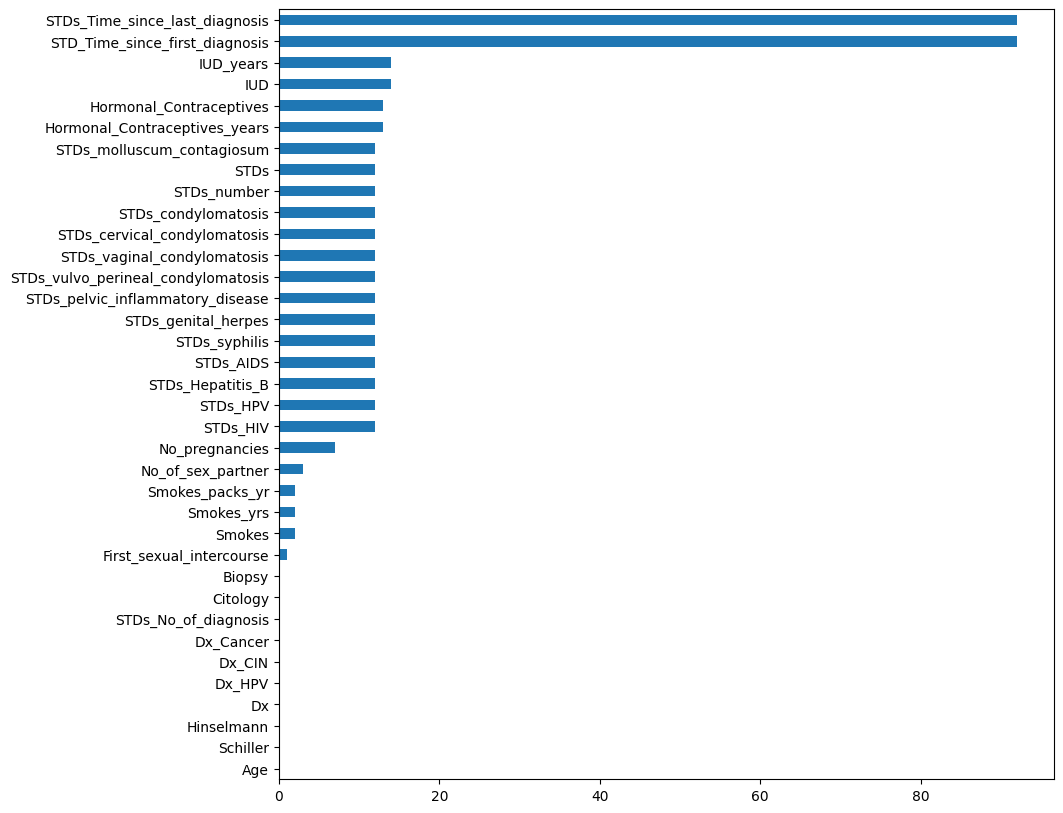

In [9]:
plt.figure(figsize=(10,10))
np.round(df.isnull().sum()/df.shape[0]*100).sort_values().plot(kind='barh')

Checking for Missing values

- Checking missing values in each feature
- we can see that 'STD-since last diagnosis' and STD-since first diagnosis are having more than 80% null values
- we are dropping it and also the 'smokes' and 'First sexual Intercourse' since they have very little amount of null values

In [10]:
df=df.drop(['STD_Time_since_first_diagnosis','STDs_Time_since_last_diagnosis'],axis=1)
df=df.drop(df.index[df.Smokes.isnull()] | df.index[df.First_sexual_intercourse.isnull()])

Partitioning the features into numerical and categorical



- we are doing it manually because there are few column like 'no of pregnancies' 'no of sex partners' 'First sexual intercourse' are of object categorical type but should be of numerical type.

In [11]:
x_features=list(df.columns)
x_features.remove('Biopsy')

In [12]:
x_features_categorical=[
 'Smokes','Hormonal_Contraceptives','IUD','STDs','STDs_condylomatosis','STDs_cervical_condylomatosis','STDs_vaginal_condylomatosis','STDs_vulvo_perineal_condylomatosis','STDs_syphilis','STDs_pelvic_inflammatory_disease','STDs_genital_herpes','STDs_molluscum_contagiosum','STDs_AIDS','STDs_HIV','STDs_Hepatitis_B','STDs_HPV','Dx_Cancer','Dx_CIN','Dx_HPV','Dx']
x_features_categorical

['Smokes',
 'Hormonal_Contraceptives',
 'IUD',
 'STDs',
 'STDs_condylomatosis',
 'STDs_cervical_condylomatosis',
 'STDs_vaginal_condylomatosis',
 'STDs_vulvo_perineal_condylomatosis',
 'STDs_syphilis',
 'STDs_pelvic_inflammatory_disease',
 'STDs_genital_herpes',
 'STDs_molluscum_contagiosum',
 'STDs_AIDS',
 'STDs_HIV',
 'STDs_Hepatitis_B',
 'STDs_HPV',
 'Dx_Cancer',
 'Dx_CIN',
 'Dx_HPV',
 'Dx']

In [13]:
x_features_numerical=[i for i in x_features if i not in x_features_categorical]
x_features_numerical

['Age',
 'No_of_sex_partner',
 'First_sexual_intercourse',
 'No_pregnancies',
 'Smokes_yrs',
 'Smokes_packs_yr',
 'Hormonal_Contraceptives_years',
 'IUD_years',
 'STDs_number',
 'STDs_No_of_diagnosis',
 'Hinselmann',
 'Schiller',
 'Citology']

# Missing Value Imputation


- since this data is sensitive we are not going to use mean or median to impute missing values, instead we are going to use machine learning models to fill missing values.
- the steps taken are:
1. Remove the column that needs to be imputed from the independent columns list.
2. For everyother independent column in the list (other than the column we are going to impute), fill the null values with mode/median depending on their datatype.
3. The concept in ML based imputation is that, we will choose the column that needs to be imputed as our 'Y' and remaining all as 'X' (basically in Step 2, we are imputing
4. X columns so that X columns wont have missing values while training the model)
So now, Y alone will be having null values that needs to be imputed.
5. Test data will be those records that contains missing values of Y where as training records will be those records that have filled values of Y.
6. So we build a ML model and train it with filled values and predict the missing values of Y.
7. For Numerical columns we choosed DecisionTreeRegressor and for Categorical columns we built DecisionTreeClassifier models.

Missing Value Imputation of IUD

In [14]:
df_iud=df.copy()

x_features_categorical.remove('IUD')
for i in x_features_categorical:
    df_iud[i]=df_iud[i].fillna(df_iud[i].mode()[0])
for i in x_features_numerical:
    df_iud[i]=df_iud[i].fillna(df_iud[i].median())

df_iud=df_iud.astype('float')
df_iud[x_features_categorical]=df_iud[x_features_categorical].replace(0,'no')
df_iud[x_features_categorical]=df_iud[x_features_categorical].replace(1,'yes')
df_iud=pd.get_dummies(df_iud)

train_iud=df_iud[df_iud.IUD.isnull()==False]
test_iud=df_iud[df_iud.IUD.isnull()]

train_iud_x=train_iud.drop('IUD',axis=1)
train_iud_y=train_iud['IUD']

test_iud_x=test_iud.drop('IUD',axis=1)
test_iud_y=test_iud['IUD']

dt=DecisionTreeClassifier()
iud_model=dt.fit(train_iud_x,train_iud_y)
test_iud['IUD']=iud_model.predict(test_iud_x)

iud_complete=pd.concat([train_iud,test_iud],axis=0)

df_impute=df.copy()
df_impute['IUD']=iud_complete['IUD'].sort_index()

- df_impute is the new dataframe that contains missing values imputed columns


Missing Value Imputation for IUD-years

Here we impute IUD missing values because of this reason:

- For all the zero values of IUD_years, the value of IUD is zero.
- For the zero values of IUD , the value of IUD_years is zero.
- The predicted value of IUD is completely zero and hence we can consider that the predicted value of IUD years will also be zero.


In [15]:
x_features_numerical.remove('IUD_years')
df_impute['IUD_years']=df_impute['IUD_years'].fillna(0)

Missing Value Imputation for Hormonal_Contraceptives

In [16]:
df_hor=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('Hormonal_Contraceptives')
for i in x_features_categorical:
    df_hor[i]=df_hor[i].fillna(df_hor[i].mode()[0])
for i in x_features_numerical:
    df_hor[i]=df_hor[i].fillna(df_hor[i].median())

df_hor=df_hor.astype('float')
df_hor[x_features_categorical]=df_hor[x_features_categorical].replace(0,'no')
df_hor[x_features_categorical]=df_hor[x_features_categorical].replace(1,'yes')
df_hor=pd.get_dummies(df_hor)

train_hor=df_hor[df_hor.Hormonal_Contraceptives.isnull()==False]
test_hor=df_hor[df_hor.Hormonal_Contraceptives.isnull()]

train_hor_x=train_hor.drop('Hormonal_Contraceptives',axis=1)
train_hor_y=train_hor['Hormonal_Contraceptives']

test_hor_x=test_hor.drop('Hormonal_Contraceptives',axis=1)
test_hor_y=test_hor['Hormonal_Contraceptives']

dt=DecisionTreeClassifier()
hor_model=dt.fit(train_hor_x,train_hor_y)
test_hor['Hormonal_Contraceptives']=hor_model.predict(test_hor_x)

hor_complete=pd.concat([train_hor,test_hor],axis=0)

df_impute['Hormonal_Contraceptives']=hor_complete['Hormonal_Contraceptives'].sort_index()

Missing Value Imputation for Hormonal_Contraceptive_Years


In [17]:
df_hor_y=df_impute.drop(['Biopsy'],axis=1)

x_features_numerical.remove('Hormonal_Contraceptives_years')
for i in x_features_categorical:
    df_hor_y[i]=df_hor_y[i].fillna(df_hor_y[i].mode()[0])

for i in x_features_numerical:
    df_hor_y[i]=df_hor_y[i].fillna(df_hor_y[i].median())

df_hor_y=df_hor_y.astype('float')
df_hor_y[x_features_categorical]=df_hor_y[x_features_categorical].replace(0,'no')
df_hor_y[x_features_categorical]=df_hor_y[x_features_categorical].replace(1,'yes')
df_hor_y=pd.get_dummies(df_hor_y)

train_hor_yrs=df_hor_y[df_hor_y.Hormonal_Contraceptives_years.isnull()==False]
test_hor_yrs=df_hor_y[df_hor_y.Hormonal_Contraceptives_years.isnull()]

train_hor_yrs_x=train_hor_yrs.drop('Hormonal_Contraceptives_years',axis=1)
train_hor_yrs_y=train_hor_yrs['Hormonal_Contraceptives_years']

test_hor_yrs_x=test_hor_yrs.drop('Hormonal_Contraceptives_years',axis=1)
test_hor_yrs_y=test_hor_yrs['Hormonal_Contraceptives_years']

dt=DecisionTreeRegressor()
hor_yrs_model=dt.fit(train_hor_yrs_x,train_hor_yrs_y)
test_hor_yrs['Hormonal_Contraceptives_years']=hor_yrs_model.predict(test_hor_yrs_x)

hor_yrs_complete=pd.concat([train_hor_yrs,test_hor_yrs],axis=0)

df_impute['Hormonal_Contraceptives_years']=hor_yrs_complete['Hormonal_Contraceptives_years'].sort_index()

Missing Value Imputation for STDs

In [18]:
df_std=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs')
for i in x_features_categorical:
    df_std[i]=df_std[i].fillna(df_std[i].mode()[0])
for i in x_features_numerical:
    df_std[i]=df_std[i].fillna(df_std[i].median())

df_std=df_std.astype('float')
df_std[x_features_categorical]=df_std[x_features_categorical].replace(0,'no')
df_std[x_features_categorical]=df_std[x_features_categorical].replace(1,'yes')
df_std=pd.get_dummies(df_std)

train_std=df_std[df_std.STDs.isnull()==False]
test_std=df_std[df_std.STDs.isnull()]

train_std_x=train_std.drop('STDs',axis=1)
train_std_y=train_std['STDs']

test_std_x=test_std.drop('STDs',axis=1)
test_std_y=test_std['STDs']

dt=DecisionTreeClassifier()
std_model=dt.fit(train_std_x,train_std_y)
test_std['STDs']=std_model.predict(test_std_x)

std_complete=pd.concat([train_std,test_std],axis=0)

df_impute['STDs']=std_complete['STDs'].sort_index()

Missing Value Imputation for STDs_Number

In [19]:
df_std_num=df_impute.drop(['Biopsy'],axis=1)

x_features_numerical.remove('STDs_number')
for i in x_features_categorical:
    df_std_num[i]=df_std_num[i].fillna(df_std_num[i].mode()[0])
for i in x_features_numerical:
    df_std_num[i]=df_std_num[i].fillna(df_std_num[i].median())

df_std_num=df_std_num.astype('float')
df_std_num[x_features_categorical]=df_std_num[x_features_categorical].replace(0,'no')
df_std_num[x_features_categorical]=df_std_num[x_features_categorical].replace(1,'yes')
df_std_num=pd.get_dummies(df_std_num)

train_std_num=df_std_num[df_std_num.STDs_number.isnull()==False]
test_std_num=df_std_num[df_std_num.STDs_number.isnull()]

train_std_num_x=train_std_num.drop('STDs_number',axis=1)
train_std_num_y=train_std_num['STDs_number']

test_std_num_x=test_std_num.drop('STDs_number',axis=1)
test_std_num_y=test_std_num['STDs_number']

dt=DecisionTreeRegressor()
std_model_num=dt.fit(train_std_num_x,train_std_num_y)
test_std_num['STDs_number']=std_model_num.predict(test_std_num_x)

std_num_complete=pd.concat([train_std_num,test_std_num],axis=0)

df_impute['STDs_number']=std_num_complete['STDs_number'].sort_index()

Missing Value Imputation for STDs_condylomatosis

In [20]:
df_std_con=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs_condylomatosis')
for i in x_features_categorical:
    df_std_con[i]=df_std_con[i].fillna(df_std_con[i].mode()[0])
for i in x_features_numerical:
    df_std_con[i]=df_std_con[i].fillna(df_std_con[i].median())

df_std_con=df_std_con.astype('float')
df_std_con[x_features_categorical]=df_std_con[x_features_categorical].replace(0,'no')
df_std_con[x_features_categorical]=df_std_con[x_features_categorical].replace(1,'yes')
df_std_con=pd.get_dummies(df_std_con)

train_std_con=df_std_con[df_std_con.STDs_condylomatosis.isnull()==False]
test_std_con=df_std_con[df_std_con.STDs_condylomatosis.isnull()]

train_std_con_x=train_std_con.drop('STDs_condylomatosis',axis=1)
train_std_con_y=train_std_con['STDs_condylomatosis']

test_std_con_x=test_std_con.drop('STDs_condylomatosis',axis=1)
test_std_con_y=test_std_con['STDs_condylomatosis']

dt=DecisionTreeClassifier()
std_model_con=dt.fit(train_std_con_x,train_std_con_y)
test_std_con['STDs_condylomatosis']=std_model_con.predict(test_std_con_x)

std_con_complete=pd.concat([train_std_con,test_std_con],axis=0)

df_impute['STDs_condylomatosis']=std_con_complete['STDs_condylomatosis'].sort_index()

Missing Value Imputation for STDs_cervical_condylomatosis

In [21]:
df_std_cerv=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs_cervical_condylomatosis')
for i in x_features_categorical:
    df_std_cerv[i]=df_std_cerv[i].fillna(df_std_cerv[i].mode()[0])
for i in x_features_numerical:
    df_std_cerv[i]=df_std_cerv[i].fillna(df_std_cerv[i].median())

df_std_cerv=df_std_cerv.astype('float')
df_std_cerv[x_features_categorical]=df_std_cerv[x_features_categorical].replace(0,'no')
df_std_cerv[x_features_categorical]=df_std_cerv[x_features_categorical].replace(1,'yes')
df_std_cerv=pd.get_dummies(df_std_cerv)

train_std_cerv=df_std_cerv[df_std_cerv.STDs_cervical_condylomatosis.isnull()==False]
test_std_cerv=df_std_cerv[df_std_cerv.STDs_cervical_condylomatosis.isnull()]

train_std_cerv_x=train_std_cerv.drop('STDs_cervical_condylomatosis',axis=1)
train_std_cerv_y=train_std_cerv['STDs_cervical_condylomatosis']

test_std_cerv_x=test_std_cerv.drop('STDs_cervical_condylomatosis',axis=1)
test_std_cerv_y=test_std_cerv['STDs_cervical_condylomatosis']

dt=DecisionTreeClassifier()
std_model_cerv=dt.fit(train_std_cerv_x,train_std_cerv_y)
test_std_cerv['STDs_cervical_condylomatosis']=std_model_cerv.predict(test_std_cerv_x)

std_cerv_complete=pd.concat([train_std_cerv,test_std_cerv],axis=0)

df_impute['STDs_cervical_condylomatosis']=std_cerv_complete['STDs_cervical_condylomatosis'].sort_index()

Missing Value Imputation for STDs_vaginal_condylomatosis

In [22]:
df_std_vagi=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs_vaginal_condylomatosis')
for i in x_features_categorical:
    df_std_vagi[i]=df_std_vagi[i].fillna(df_std_vagi[i].mode()[0])
for i in x_features_numerical:
    df_std_vagi[i]=df_std_vagi[i].fillna(df_std_vagi[i].median())

df_std_vagi=df_std_vagi.astype('float')
df_std_vagi[x_features_categorical]=df_std_vagi[x_features_categorical].replace(0,'no')
df_std_vagi[x_features_categorical]=df_std_vagi[x_features_categorical].replace(1,'yes')
df_std_vagi=pd.get_dummies(df_std_vagi)

train_std_vagi=df_std_vagi[df_std_vagi.STDs_vaginal_condylomatosis.isnull()==False]
test_std_vagi=df_std_vagi[df_std_vagi.STDs_vaginal_condylomatosis.isnull()]

train_std_vagi_x=train_std_vagi.drop('STDs_vaginal_condylomatosis',axis=1)
train_std_vagi_y=train_std_vagi['STDs_vaginal_condylomatosis']

test_std_vagi_x=test_std_vagi.drop('STDs_vaginal_condylomatosis',axis=1)
test_std_vagi_y=test_std_vagi['STDs_vaginal_condylomatosis']

dt=DecisionTreeClassifier()
std_model_vagi=dt.fit(train_std_vagi_x,train_std_vagi_y)
test_std_vagi['STDs_vaginal_condylomatosis']=std_model_vagi.predict(test_std_vagi_x)

std_vagi_complete=pd.concat([train_std_vagi,test_std_vagi],axis=0)

df_impute['STDs_vaginal_condylomatosis']=std_vagi_complete['STDs_vaginal_condylomatosis'].sort_index()

Missing Value Imputation for STDs_vulvo_perineal_condylomatosis

In [23]:
df_std_peri=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs_vulvo_perineal_condylomatosis')
for i in x_features_categorical:
    df_std_peri[i]=df_std_peri[i].fillna(df_std_peri[i].mode()[0])
for i in x_features_numerical:
    df_std_peri[i]=df_std_peri[i].fillna(df_std_peri[i].median())

df_std_peri=df_std_peri.astype('float')
df_std_peri[x_features_categorical]=df_std_peri[x_features_categorical].replace(0,'no')
df_std_peri[x_features_categorical]=df_std_peri[x_features_categorical].replace(1,'yes')
df_std_peri=pd.get_dummies(df_std_peri)

train_std_peri=df_std_peri[df_std_peri.STDs_vulvo_perineal_condylomatosis.isnull()==False]
test_std_peri=df_std_peri[df_std_peri.STDs_vulvo_perineal_condylomatosis.isnull()]

train_std_peri_x=train_std_peri.drop('STDs_vulvo_perineal_condylomatosis',axis=1)
train_std_peri_y=train_std_peri['STDs_vulvo_perineal_condylomatosis']

test_std_peri_x=test_std_peri.drop('STDs_vulvo_perineal_condylomatosis',axis=1)
test_std_peri_y=test_std_peri['STDs_vulvo_perineal_condylomatosis']

dt=DecisionTreeClassifier()
std_model_peri=dt.fit(train_std_peri_x,train_std_peri_y)
test_std_peri['STDs_vulvo_perineal_condylomatosis']=std_model_peri.predict(test_std_peri_x)

std_peri_complete=pd.concat([train_std_peri,test_std_peri],axis=0)

df_impute['STDs_vulvo_perineal_condylomatosis']=std_peri_complete['STDs_vulvo_perineal_condylomatosis'].sort_index()

Missing Value Imputation for STDs_syphilis

In [24]:
df_std_syp=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs_syphilis')
for i in x_features_categorical:
    df_std_syp[i]=df_std_syp[i].fillna(df_std_syp[i].mode()[0])
for i in x_features_numerical:
    df_std_syp[i]=df_std_syp[i].fillna(df_std_syp[i].median())

df_std_syp=df_std_syp.astype('float')
df_std_syp[x_features_categorical]=df_std_syp[x_features_categorical].replace(0,'no')
df_std_syp[x_features_categorical]=df_std_syp[x_features_categorical].replace(1,'yes')
df_std_syp=pd.get_dummies(df_std_syp)

train_std_syp=df_std_syp[df_std_syp.STDs_syphilis.isnull()==False]
test_std_syp=df_std_syp[df_std_syp.STDs_syphilis.isnull()]

train_std_syp_x=train_std_syp.drop('STDs_syphilis',axis=1)
train_std_syp_y=train_std_syp['STDs_syphilis']

test_std_syp_x=test_std_syp.drop('STDs_syphilis',axis=1)
test_std_syp_y=test_std_syp['STDs_syphilis']

dt=DecisionTreeClassifier()
std_model_syp=dt.fit(train_std_syp_x,train_std_syp_y)
test_std_syp['STDs_syphilis']=std_model_syp.predict(test_std_syp_x)

std_syp_complete=pd.concat([train_std_syp,test_std_syp],axis=0)

df_impute['STDs_syphilis']=std_syp_complete['STDs_syphilis'].sort_index()

Missing Value Imputation for STDs_pelvic_inflammatory_disease

In [25]:
df_std_pelv=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs_pelvic_inflammatory_disease')
for i in x_features_categorical:
    df_std_pelv[i]=df_std_pelv[i].fillna(df_std_pelv[i].mode()[0])

for i in x_features_numerical:
    df_std_pelv[i]=df_std_pelv[i].fillna(df_std_pelv[i].median())

df_std_pelv=df_std_pelv.astype('float')
df_std_pelv[x_features_categorical]=df_std_pelv[x_features_categorical].replace(0,'no')
df_std_pelv[x_features_categorical]=df_std_pelv[x_features_categorical].replace(1,'yes')
df_std_pelv=pd.get_dummies(df_std_pelv)

train_std_pelv=df_std_pelv[df_std_pelv.STDs_pelvic_inflammatory_disease.isnull()==False]
test_std_pelv=df_std_pelv[df_std_pelv.STDs_pelvic_inflammatory_disease.isnull()]

train_std_pelv_x=train_std_pelv.drop('STDs_pelvic_inflammatory_disease',axis=1)
train_std_pelv_y=train_std_pelv['STDs_pelvic_inflammatory_disease']

test_std_pelv_x=test_std_pelv.drop('STDs_pelvic_inflammatory_disease',axis=1)
test_std_pelv_y=test_std_pelv['STDs_pelvic_inflammatory_disease']

dt=DecisionTreeClassifier()
std_model_pelv=dt.fit(train_std_pelv_x,train_std_pelv_y)
test_std_pelv['STDs_pelvic_inflammatory_disease']=std_model_pelv.predict(test_std_pelv_x)

std_pelv_complete=pd.concat([train_std_pelv,test_std_pelv],axis=0)

df_impute['STDs_pelvic_inflammatory_disease']=std_pelv_complete['STDs_pelvic_inflammatory_disease'].sort_index()

Missing Value Imputation for STDs_genital_herpes

In [26]:
df_std_geni=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs_genital_herpes')
for i in x_features_categorical:
    df_std_geni[i]=df_std_geni[i].fillna(df_std_geni[i].mode()[0])
for i in x_features_numerical:
    df_std_geni[i]=df_std_geni[i].fillna(df_std_geni[i].median())

df_std_geni=df_std_geni.astype('float')
df_std_geni[x_features_categorical]=df_std_geni[x_features_categorical].replace(0,'no')
df_std_geni[x_features_categorical]=df_std_geni[x_features_categorical].replace(1,'yes')
df_std_geni=pd.get_dummies(df_std_geni)

train_std_geni=df_std_geni[df_std_geni.STDs_genital_herpes.isnull()==False]
test_std_geni=df_std_geni[df_std_geni.STDs_genital_herpes.isnull()]

train_std_geni_x=train_std_geni.drop('STDs_genital_herpes',axis=1)
train_std_geni_y=train_std_geni['STDs_genital_herpes']

test_std_geni_x=test_std_geni.drop('STDs_genital_herpes',axis=1)
test_std_geni_y=test_std_geni['STDs_genital_herpes']

dt=DecisionTreeClassifier()
std_model_geni=dt.fit(train_std_geni_x,train_std_geni_y)
test_std_geni['STDs_genital_herpes']=std_model_geni.predict(test_std_geni_x)

std_geni_complete=pd.concat([train_std_geni,test_std_geni],axis=0)

df_impute['STDs_genital_herpes']=std_geni_complete['STDs_genital_herpes'].sort_index()

Missing Value Imputation for STDs_molluscum_contagiosum

In [27]:
df_std_mollu=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs_molluscum_contagiosum')
for i in x_features_categorical:
    df_std_mollu[i]=df_std_mollu[i].fillna(df_std_mollu[i].mode()[0])
for i in x_features_numerical:
    df_std_mollu[i]=df_std_mollu[i].fillna(df_std_mollu[i].median())

df_std_mollu=df_std_mollu.astype('float')
df_std_mollu[x_features_categorical]=df_std_mollu[x_features_categorical].replace(0,'no')
df_std_mollu[x_features_categorical]=df_std_mollu[x_features_categorical].replace(1,'yes')
df_std_mollu=pd.get_dummies(df_std_mollu)

train_std_mollu=df_std_mollu[df_std_mollu.STDs_molluscum_contagiosum.isnull()==False]
test_std_mollu=df_std_mollu[df_std_mollu.STDs_molluscum_contagiosum.isnull()]

train_std_mollu_x=train_std_mollu.drop('STDs_molluscum_contagiosum',axis=1)
train_std_mollu_y=train_std_mollu['STDs_molluscum_contagiosum']

test_std_mollu_x=test_std_mollu.drop('STDs_molluscum_contagiosum',axis=1)
test_std_mollu_y=test_std_mollu['STDs_molluscum_contagiosum']

dt=DecisionTreeClassifier()
std_model_mollu=dt.fit(train_std_mollu_x,train_std_mollu_y)
test_std_mollu['STDs_molluscum_contagiosum']=std_model_mollu.predict(test_std_mollu_x)

std_mollu_complete=pd.concat([train_std_mollu,test_std_mollu],axis=0)

df_impute['STDs_molluscum_contagiosum']=std_mollu_complete['STDs_molluscum_contagiosum'].sort_index()

Missing Value Imputation for STDs_AIDS

In [28]:
df_std_aids=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs_AIDS')
for i in x_features_categorical:
    df_std_aids[i]=df_std_aids[i].fillna(df_std_aids[i].mode()[0])
for i in x_features_numerical:
    df_std_aids[i]=df_std_aids[i].fillna(df_std_aids[i].median())

df_std_aids=df_std_aids.astype('float')
df_std_aids[x_features_categorical]=df_std_aids[x_features_categorical].replace(0,'no')
df_std_aids[x_features_categorical]=df_std_aids[x_features_categorical].replace(1,'yes')
df_std_aids=pd.get_dummies(df_std_aids)

train_std_aids=df_std_aids[df_std_aids.STDs_AIDS.isnull()==False]
test_std_aids=df_std_aids[df_std_aids.STDs_AIDS.isnull()]

train_std_aids_x=train_std_aids.drop('STDs_AIDS',axis=1)
train_std_aids_y=train_std_aids['STDs_AIDS']

test_std_aids_x=test_std_aids.drop('STDs_AIDS',axis=1)
test_std_aids_y=test_std_aids['STDs_AIDS']

dt=DecisionTreeClassifier()
std_model_aids=dt.fit(train_std_aids_x,train_std_aids_y)
test_std_aids['STDs_AIDS']=std_model_aids.predict(test_std_aids_x)

std_aids_complete=pd.concat([train_std_aids,test_std_aids],axis=0)

df_impute['STDs_AIDS']=std_aids_complete['STDs_AIDS'].sort_index()

Missing Value Imputation for STDs_HIV

In [29]:
df_std_hiv=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs_HIV')
for i in x_features_categorical:
    df_std_hiv[i]=df_std_hiv[i].fillna(df_std_hiv[i].mode()[0])
for i in x_features_numerical:
    df_std_hiv[i]=df_std_hiv[i].fillna(df_std_hiv[i].median())

df_std_hiv=df_std_hiv.astype('float')
df_std_hiv[x_features_categorical]=df_std_hiv[x_features_categorical].replace(0,'no')
df_std_hiv[x_features_categorical]=df_std_hiv[x_features_categorical].replace(1,'yes')
df_std_hiv=pd.get_dummies(df_std_hiv)

train_std_hiv=df_std_hiv[df_std_hiv.STDs_HIV.isnull()==False]
test_std_hiv=df_std_hiv[df_std_hiv.STDs_HIV.isnull()]

train_std_hiv_x=train_std_hiv.drop('STDs_HIV',axis=1)
train_std_hiv_y=train_std_hiv['STDs_HIV']

test_std_hiv_x=test_std_hiv.drop('STDs_HIV',axis=1)
test_std_hiv_y=test_std_hiv['STDs_HIV']

dt=DecisionTreeClassifier()
std_model_hiv=dt.fit(train_std_hiv_x,train_std_hiv_y)
test_std_hiv['STDs_HIV']=std_model_hiv.predict(test_std_hiv_x)

std_hiv_complete=pd.concat([train_std_hiv,test_std_hiv],axis=0)

df_impute['STDs_HIV']=std_hiv_complete['STDs_HIV'].sort_index()

Missing Value Imputation for STDs_Hepatitis_B

In [30]:
df_std_hepa=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs_Hepatitis_B')
for i in x_features_categorical:
    df_std_hepa[i]=df_std_hepa[i].fillna(df_std_hepa[i].mode()[0])
for i in x_features_numerical:
    df_std_hepa[i]=df_std_hepa[i].fillna(df_std_hepa[i].median())

df_std_hepa=df_std_hepa.astype('float')
df_std_hepa[x_features_categorical]=df_std_hepa[x_features_categorical].replace(0,'no')
df_std_hepa[x_features_categorical]=df_std_hepa[x_features_categorical].replace(1,'yes')
df_std_hepa=pd.get_dummies(df_std_hepa)

train_std_hepa=df_std_hepa[df_std_hepa.STDs_Hepatitis_B.isnull()==False]
test_std_hepa=df_std_hepa[df_std_hepa.STDs_Hepatitis_B.isnull()]

train_std_hepa_x=train_std_hepa.drop(['STDs_Hepatitis_B'],axis=1)
train_std_hepa_y=train_std_hepa['STDs_Hepatitis_B']

test_std_hepa_x=test_std_hepa.drop(['STDs_Hepatitis_B'],axis=1)
test_std_hepa_y=test_std_hepa['STDs_Hepatitis_B']

dt=DecisionTreeClassifier()
std_model_hepa=dt.fit(train_std_hepa_x,train_std_hepa_y)
test_std_hepa['STDs_Hepatitis_B']=std_model_hepa.predict(test_std_hepa_x)

std_hepa_complete=pd.concat([train_std_hepa,test_std_hepa],axis=0)

df_impute['STDs_Hepatitis_B']=std_hepa_complete['STDs_Hepatitis_B'].sort_index()

Missing Value Imputation for STDs_HPV

In [31]:
df_std_hpv=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs_HPV')
for i in x_features_categorical:
    df_std_hpv[i]=df_std_hpv[i].fillna(df_std_hpv[i].mode()[0])
for i in x_features_numerical:
    df_std_hpv[i]=df_std_hpv[i].fillna(df_std_hpv[i].median())

df_std_hpv=df_std_hpv.astype('float')
df_std_hpv[x_features_categorical]=df_std_hpv[x_features_categorical].replace(0,'no')
df_std_hpv[x_features_categorical]=df_std_hpv[x_features_categorical].replace(1,'yes')
df_std_hpv=pd.get_dummies(df_std_hpv)

train_std_hpv=df_std_hpv[df_std_hpv.STDs_HPV.isnull()==False]
test_std_hpv=df_std_hpv[df_std_hpv.STDs_HPV.isnull()]

train_std_hpv_x=train_std_hpv.drop(['STDs_HPV'],axis=1)
train_std_hpv_y=train_std_hpv['STDs_HPV']

test_std_hpv_x=test_std_hpv.drop(['STDs_HPV'],axis=1)
test_std_hpv_y=test_std_hpv['STDs_HPV']

dt=DecisionTreeClassifier()
std_model_hpv=dt.fit(train_std_hpv_x,train_std_hpv_y)
test_std_hpv['STDs_HPV']=std_model_hpv.predict(test_std_hpv_x)

std_hpv_complete=pd.concat([train_std_hpv,test_std_hpv],axis=0)

df_impute['STDs_HPV']=std_hpv_complete['STDs_HPV'].sort_index()

Missing Value Imputation for No_pregnancies

In [32]:
df_no_preg=df_impute.drop(['Biopsy'],axis=1)

x_features_numerical.remove('No_pregnancies')
for i in x_features_numerical:
    df_no_preg[i]=df_no_preg[i].fillna(df_no_preg[i].median())
for i in x_features_categorical:
    df_no_preg[i]=df_no_preg[i].fillna(df_no_preg[i].mode()[0])

df_no_preg=df_no_preg.astype('float')
df_no_preg[x_features_categorical]=df_no_preg[x_features_categorical].replace(0,'no')
df_no_preg[x_features_categorical]=df_no_preg[x_features_categorical].replace(1,'yes')
df_no_preg=pd.get_dummies(df_no_preg)

train_no_preg=df_no_preg[df_no_preg.No_pregnancies.isnull()==False]
test_no_preg=df_no_preg[df_no_preg.No_pregnancies.isnull()]

train_no_preg_x=train_no_preg.drop(['No_pregnancies'],axis=1)
train_no_preg_y=train_no_preg['No_pregnancies']

test_no_preg_x=test_no_preg.drop(['No_pregnancies'],axis=1)
test_no_preg_y=test_no_preg['No_pregnancies']

dt=DecisionTreeRegressor()
model_no_preg=dt.fit(train_no_preg_x,train_no_preg_y)
test_no_preg['No_pregnancies']=model_no_preg.predict(test_no_preg_x)

no_preg_complete=pd.concat([train_no_preg,test_no_preg],axis=0)

df_impute['No_pregnancies']=no_preg_complete['No_pregnancies'].sort_index()

Missing Value Imputation for No_of_sex_partner

In [33]:
df_no_sexptnr=df_impute.drop(['Biopsy'],axis=1)

x_features_numerical.remove('No_of_sex_partner')
for i in x_features_numerical:
    df_no_sexptnr[i]=df_no_sexptnr[i].fillna(df_no_sexptnr[i].median())
for i in x_features_categorical:
    df_no_sexptnr[i]=df_no_sexptnr[i].fillna(df_no_sexptnr[i].mode()[0])

df_no_sexptnr=df_no_sexptnr.astype('float')
df_no_sexptnr[x_features_categorical]=df_no_sexptnr[x_features_categorical].replace(0,'no')
df_no_sexptnr[x_features_categorical]=df_no_sexptnr[x_features_categorical].replace(1,'yes')
df_no_sexptnr=pd.get_dummies(df_no_sexptnr)

train_no_sexptnr=df_no_sexptnr[df_no_sexptnr.No_of_sex_partner.isnull()==False]
test_no_sexptnr=df_no_sexptnr[df_no_sexptnr.No_of_sex_partner.isnull()]

train_no_sexptnr_x=train_no_sexptnr.drop(['No_of_sex_partner'],axis=1)
train_no_sexptnr_y=train_no_sexptnr['No_of_sex_partner']

test_no_sexptnr_x=test_no_sexptnr.drop(['No_of_sex_partner'],axis=1)
test_no_sexptnr_y=test_no_sexptnr['No_of_sex_partner']

dt=DecisionTreeRegressor()
model_no_sexptnr=dt.fit(train_no_sexptnr_x,train_no_sexptnr_y)
test_no_sexptnr['No_of_sex_partner']=model_no_sexptnr.predict(test_no_sexptnr_x)

no_sexptnr_complete=pd.concat([train_no_sexptnr,test_no_sexptnr],axis=0)

df_impute['No_of_sex_partner']=no_sexptnr_complete['No_of_sex_partner'].sort_index()

In [34]:
df_impute.isnull().sum()

Age                                   0
No_of_sex_partner                     0
First_sexual_intercourse              0
No_pregnancies                        0
Smokes                                0
Smokes_yrs                            0
Smokes_packs_yr                       0
Hormonal_Contraceptives               0
Hormonal_Contraceptives_years         0
IUD                                   0
IUD_years                             0
STDs                                  0
STDs_number                           0
STDs_condylomatosis                   0
STDs_cervical_condylomatosis          0
STDs_vaginal_condylomatosis           0
STDs_vulvo_perineal_condylomatosis    0
STDs_syphilis                         0
STDs_pelvic_inflammatory_disease      0
STDs_genital_herpes                   0
STDs_molluscum_contagiosum            0
STDs_AIDS                             0
STDs_HIV                              0
STDs_Hepatitis_B                      0
STDs_HPV                              0


- we have imputed all the columns that have null values

In [35]:
df_impute[['Age','No_pregnancies', 'No_of_sex_partner',
 'First_sexual_intercourse',
 'Smokes_yrs',
 'Smokes_packs_yr',
 'STDs_No_of_diagnosis', 'Hormonal_Contraceptives_years', 'IUD_years', 'STDs_number']].describe()

,Age,No_pregnancies,No_of_sex_partner,STDs_No_of_diagnosis,Hormonal_Contraceptives_years,STDs_number
count,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000
mean,26.812649,2.266508,2.510143,0.084726,2.369605,0.151551
std,8.529209,1.443862,1.590430,0.295293,3.808980,0.521638
min,13.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,20.000000,1.000000,2.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,2.000000,0.000000,0.580000,0.000000
75%,32.000000,3.000000,3.000000,0.000000,3.000000,0.000000
max,84.000000,11.000000,28.000000,3.000000,30.000000,4.000000


In [36]:
df_impute.to_csv('df_imputation.csv')

# Explotary Data Analysis


In [37]:
df = pd.read_csv('df_imputation.csv', index_col=0) #df_imputation is the new CSV file that doesn't have any null values.

#Again manually segregating categorical and numerical colmuns

x_features_categorical = ['Smokes','Hormonal_Contraceptives','IUD','STDs','STDs_condylomatosis','STDs_cervical_condylomatosis',
                          'STDs_vaginal_condylomatosis','STDs_vulvo_perineal_condylomatosis','STDs_syphilis',
                          'STDs_pelvic_inflammatory_disease','STDs_genital_herpes','STDs_molluscum_contagiosum','STDs_AIDS',
                          'STDs_HIV','STDs_Hepatitis_B','STDs_HPV','Dx_Cancer','Dx_CIN','Dx_HPV','Dx', 'Hinselmann', 'Citology', 'Biopsy']

x_features_numerical = [x for x in df.columns if x not in x_features_categorical]

Univariate Analysis


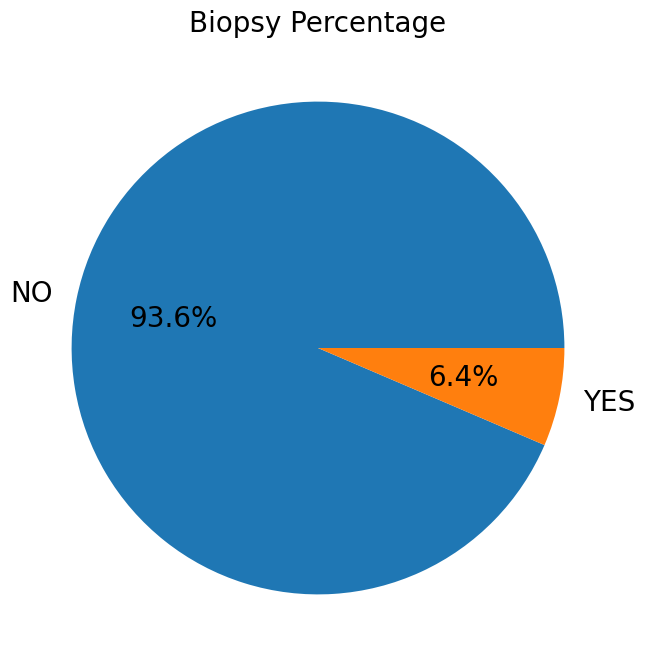

In [38]:
impute = df.copy()
impute=df.astype('float')

plt.figure(figsize = (12,8))
plt.pie(impute['Biopsy'].value_counts(), labels = ['NO', 'YES'], autopct = '%1.1f%%', labeldistance=1.1, textprops = {'fontsize': 20})
plt.title('Biopsy Percentage', fontsize=20)
plt.show()

- So, only 6.4% of the record have positive biopsy result i.e. people having cervical cancer.
- Therefore there is a imbalance in the data which needs to taken care in model building section.


Count Plots of Categorical Columns

****************************************************************************************************


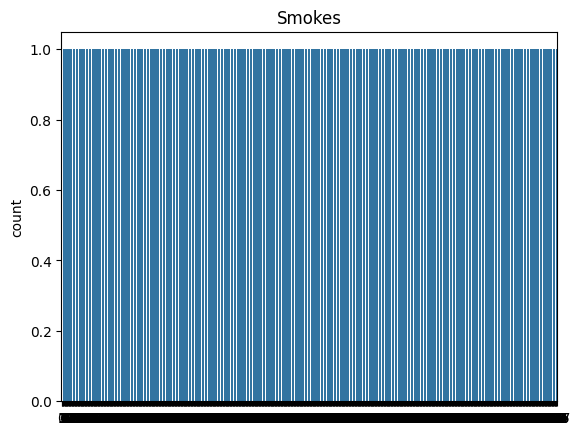

****************************************************************************************************


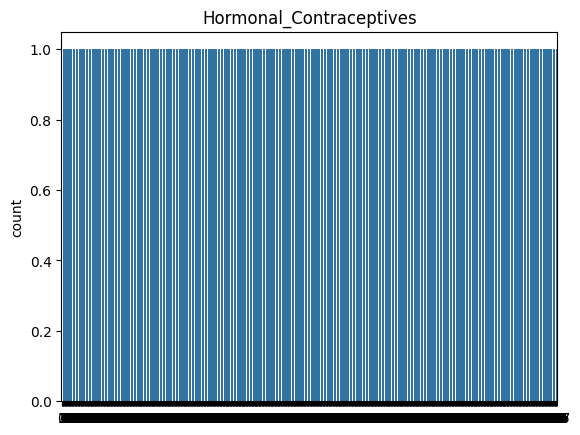

****************************************************************************************************


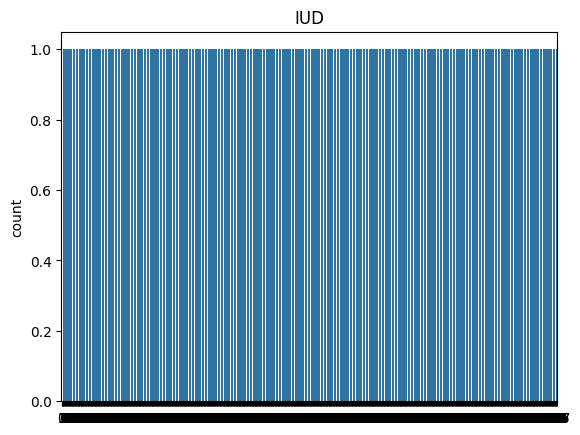

****************************************************************************************************


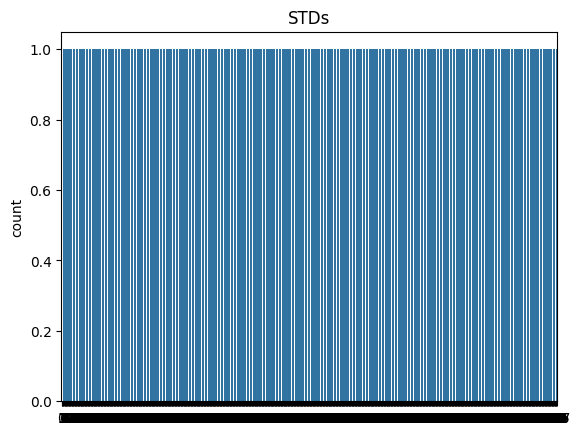

****************************************************************************************************


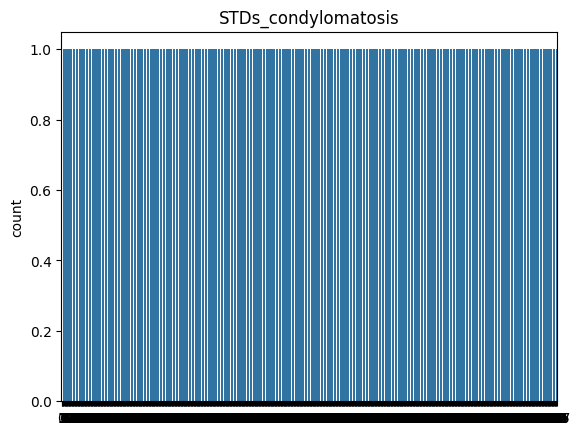

****************************************************************************************************


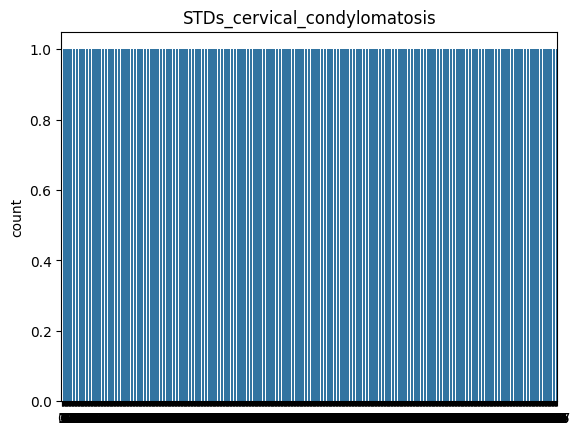

****************************************************************************************************


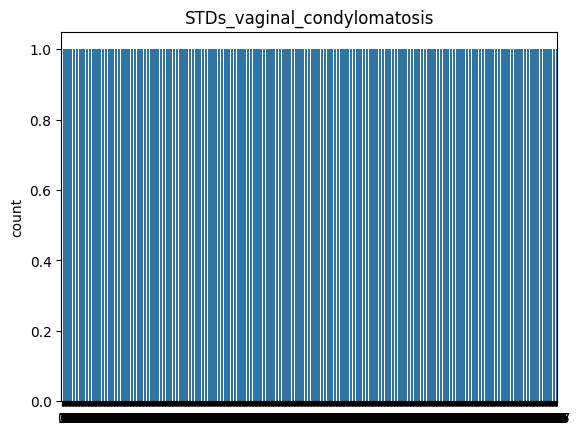

****************************************************************************************************


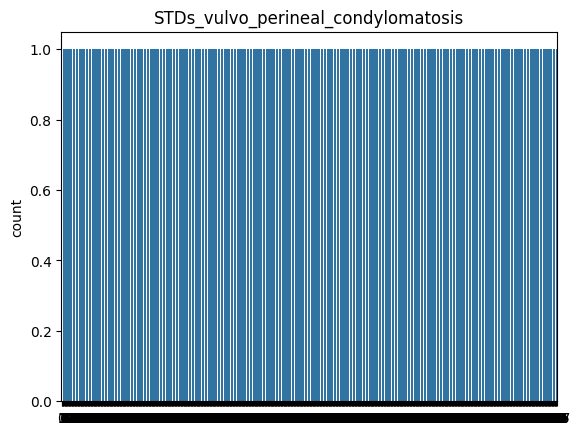

****************************************************************************************************


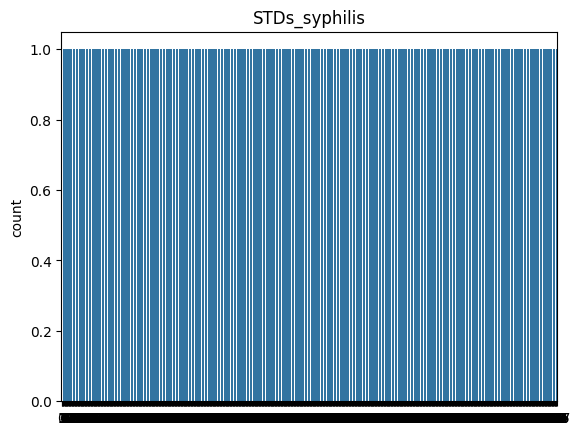

****************************************************************************************************


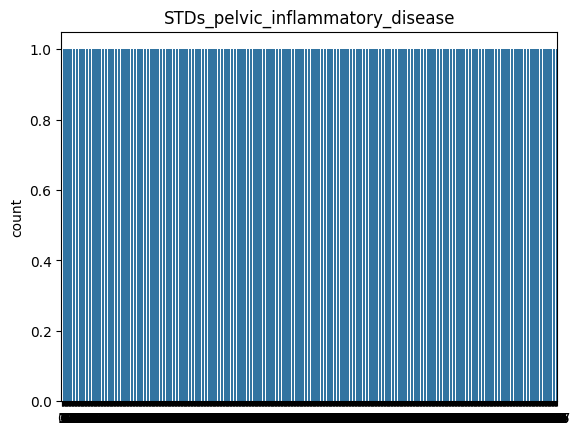

****************************************************************************************************


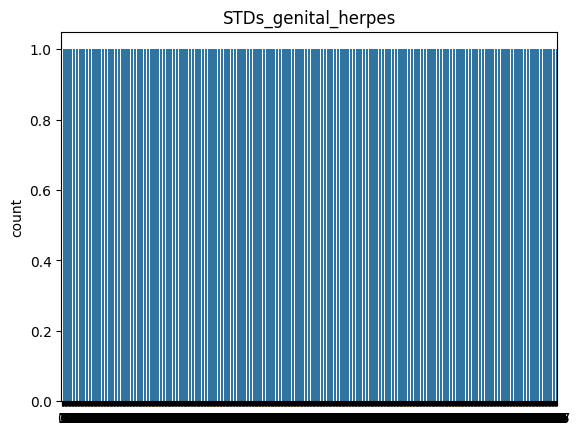

****************************************************************************************************


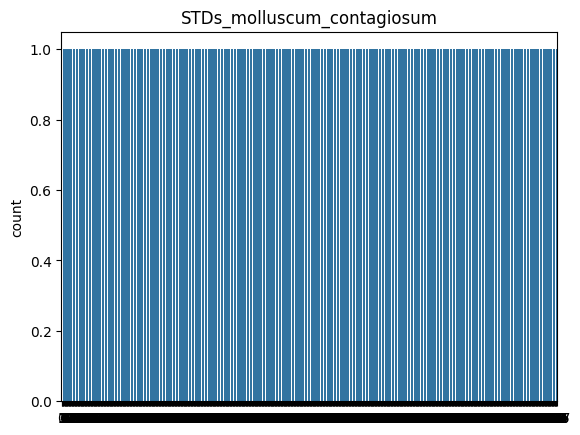

****************************************************************************************************


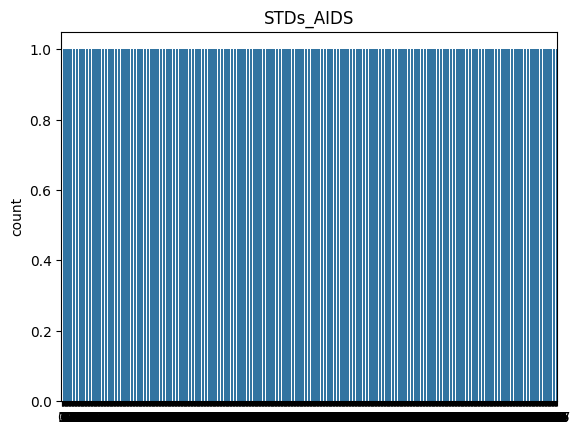

****************************************************************************************************


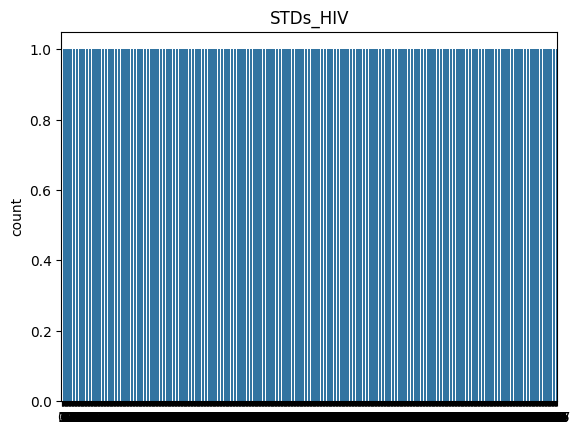

****************************************************************************************************


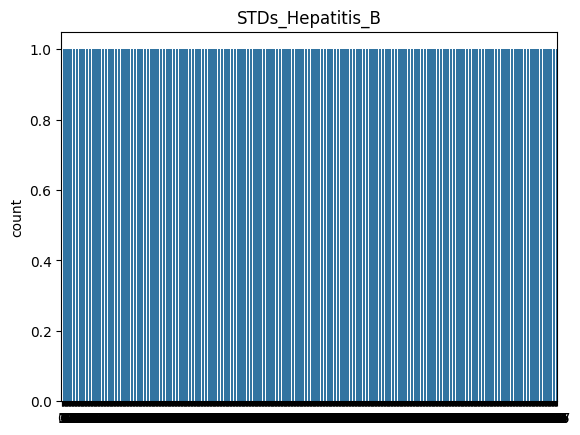

****************************************************************************************************


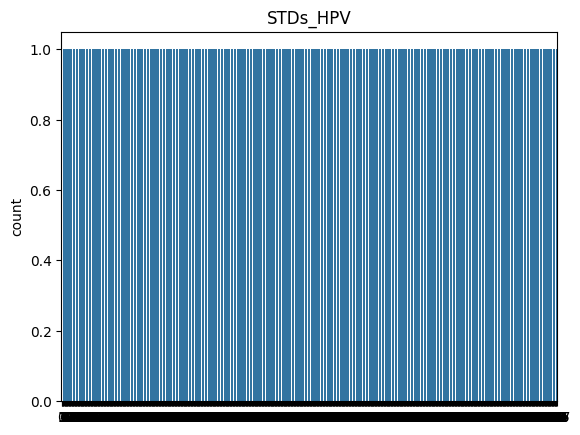

****************************************************************************************************


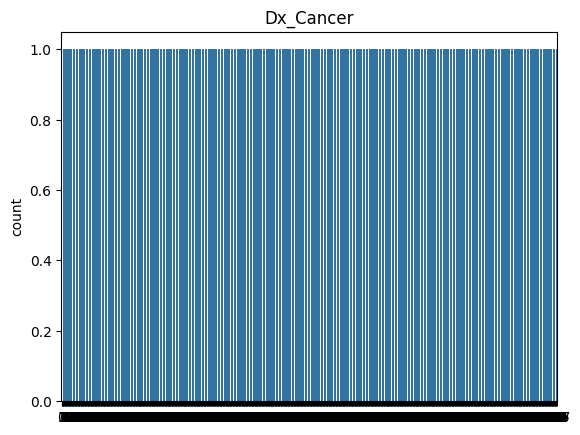

****************************************************************************************************


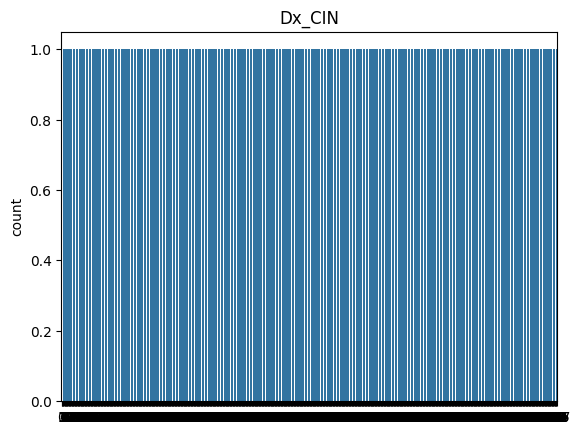

****************************************************************************************************


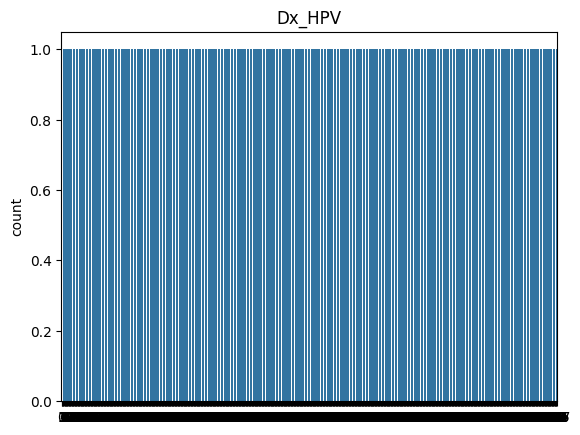

****************************************************************************************************


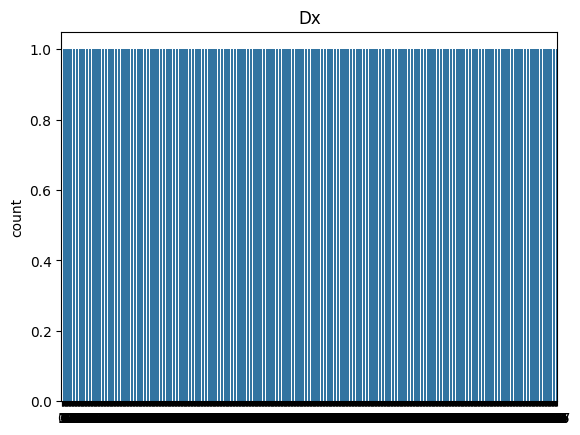

****************************************************************************************************


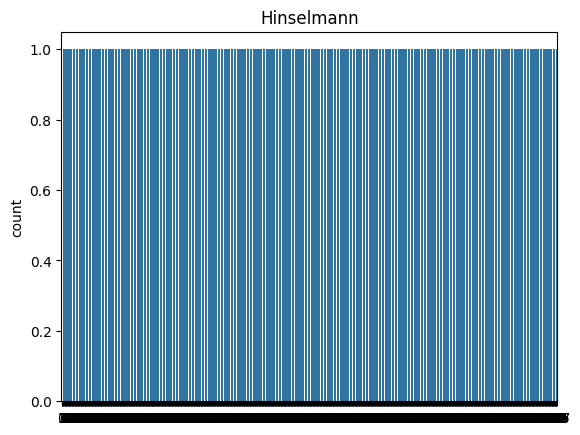

****************************************************************************************************


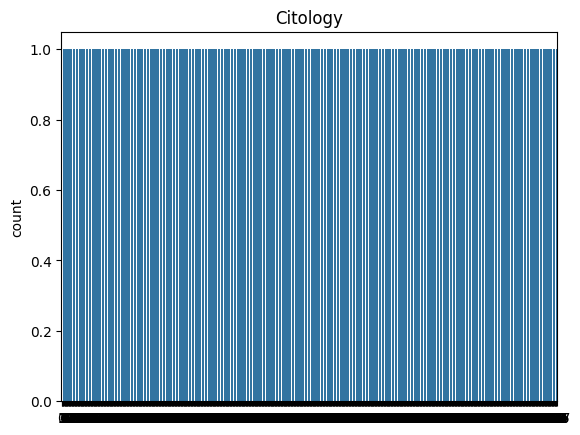

****************************************************************************************************


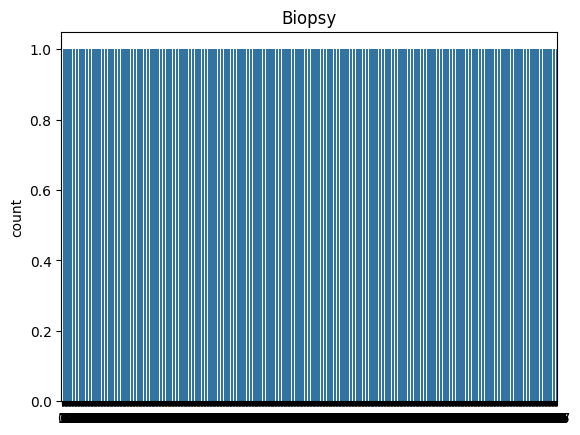

In [39]:
print("Count Plots of Categorical Columns");print()
for i in impute[x_features_categorical]:
        print('*'*100)
        sns.countplot(impute[i])
        plt.title(i)
        plt.show()

Density Plots

****************************************************************************************************


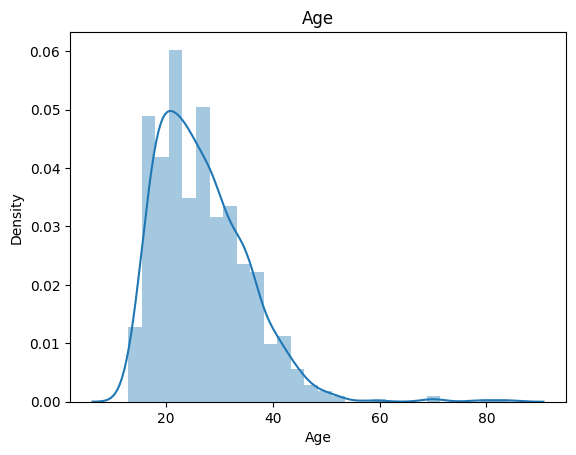

****************************************************************************************************


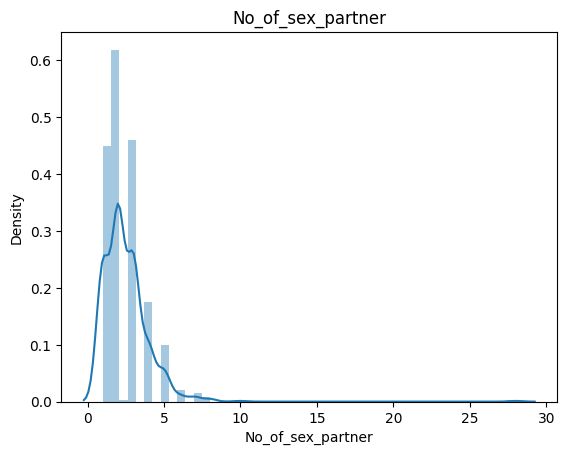

****************************************************************************************************


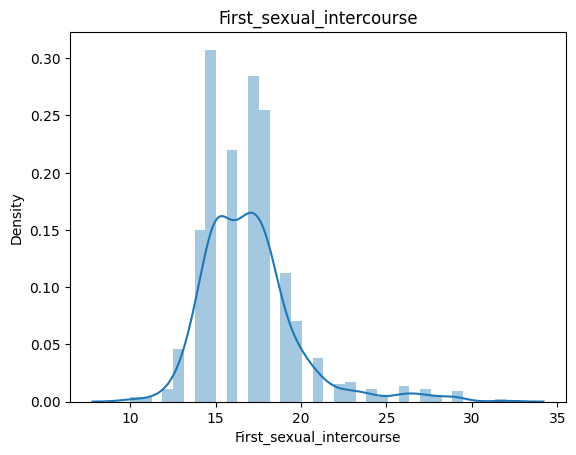

****************************************************************************************************


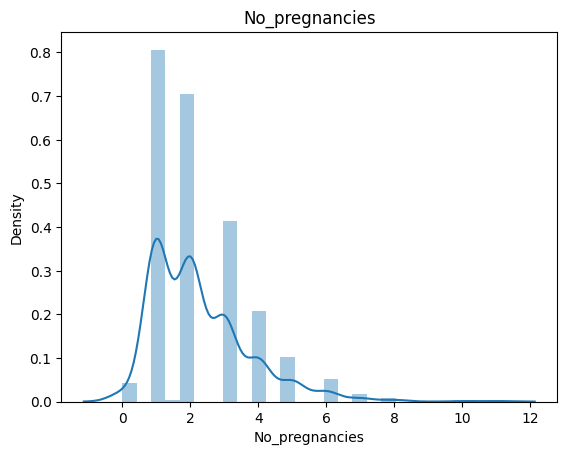

****************************************************************************************************


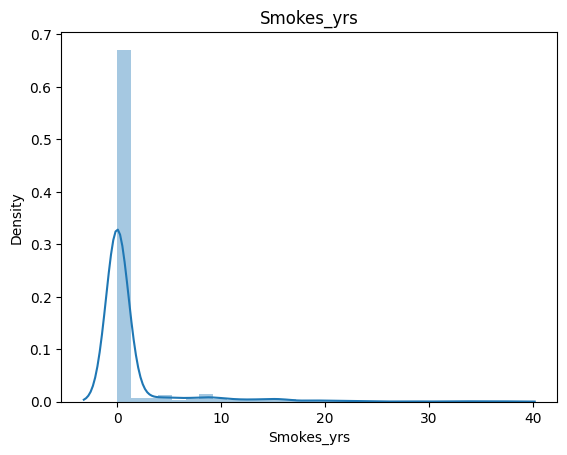

****************************************************************************************************


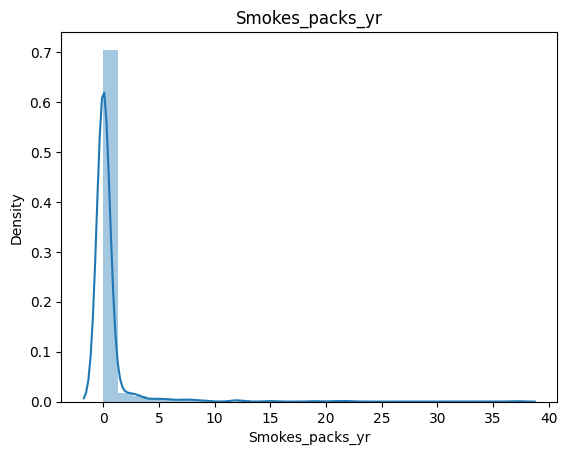

****************************************************************************************************


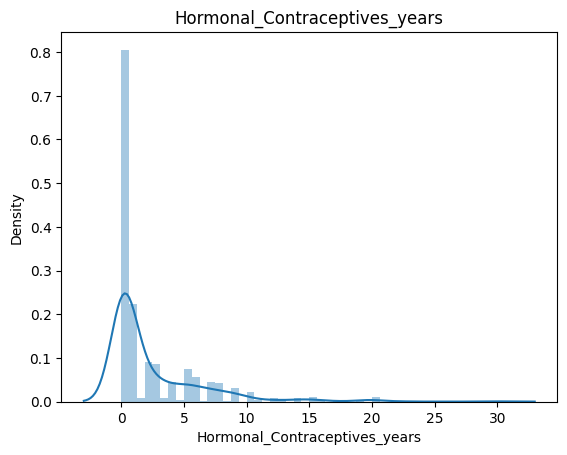

****************************************************************************************************


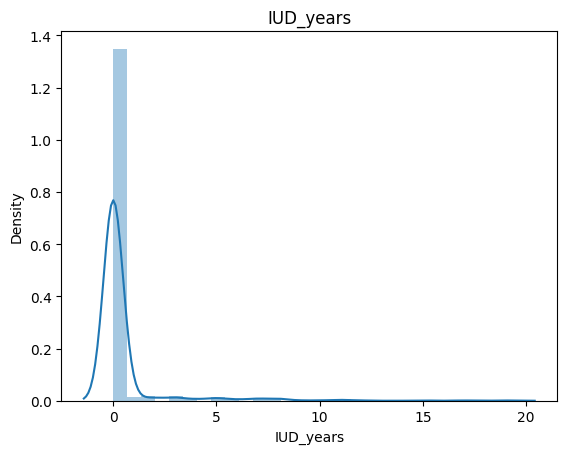

****************************************************************************************************


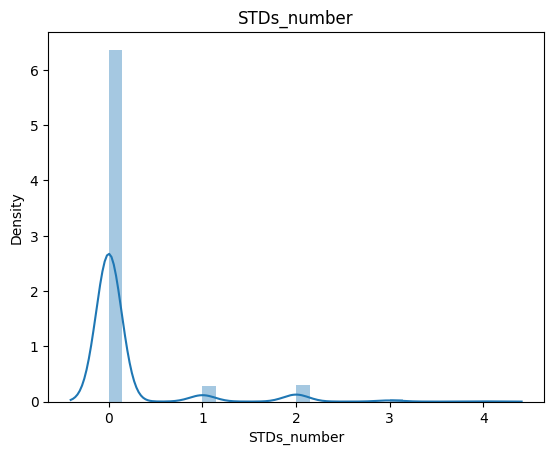

****************************************************************************************************


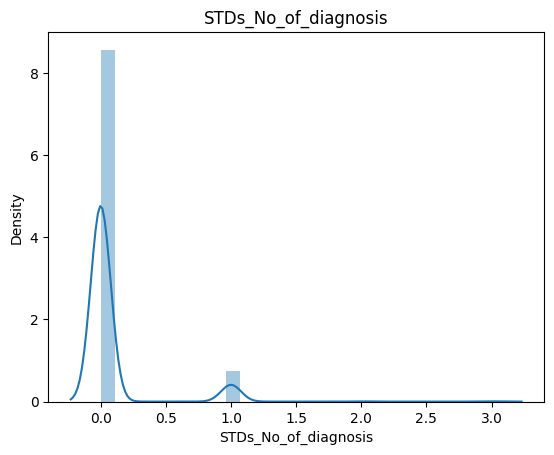

****************************************************************************************************


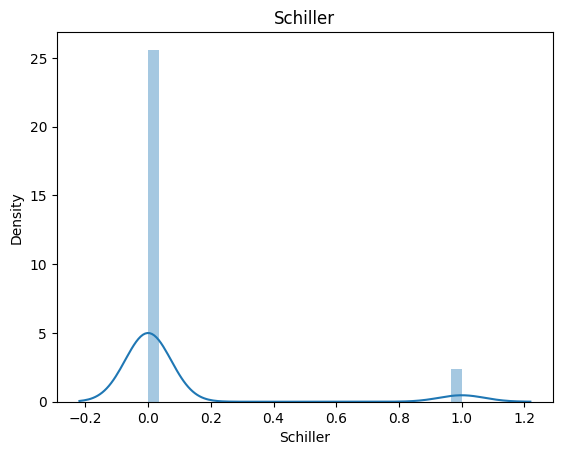

In [40]:
print("Density Plots");print()
for i in impute[x_features_numerical]:
        print('*'*100)
        sns.distplot(impute[i])
        plt.title(i)
        plt.show()

Insights
- Most of the patients are in the age group 20-40
- we have grouped overall features into:
    1. Sexual habits attributes
    2. Smoking habits attributes
    3. Birth control attributes
    4. STD attributes

    Smoking Habits :
- Relatively larger proportion of the patients are non smokers (around 700) and only a very few (around 100) are smokers.
    Sexual Habits :
- Predominant of the patients had 0 -5 sexual partners.
- Most of them had their first sexual intercourse between 15 - 20 years.
- The larger group of patient had 1 -3 pregancies overall in their life.
    Birth Control Habits :
- Most of the patients have used Hormonal contraceptives methods like pills and medications for birth controls where only a few of them have opted for intrauterine devices (IUDs). The reason for this is may be that hormonal contraceptives are readily available in shops (needs presciption) and one can take those at their home on their own with some sort of guidance where as IUD needs an doctor supervision and the patient needs to be in hospital.
- Generally most patients have used birth control methods only for less than 2 years while very few of them have used more than 2 years.
    Sexually Transmitted Diseases :
- The countplot above depicts that only a very very people are affected by any one of the STDs.
- So clearly there's an imbalance here and hence we can suggest that the STD attributes may have significant role while building the models.

# Multivariate Analysis


Binning the columns that deals with years

In [41]:
impute[x_features_categorical]=impute[x_features_categorical].replace(0,'no')
impute[x_features_categorical]=impute[x_features_categorical].replace(1,'yes')

impute.Smokes_yrs=impute.Smokes_yrs.astype('float64')
impute.IUD_years=impute.IUD_years.astype('float64')
impute.Smokes_packs_yr=impute.Smokes_packs_yr.astype('float64')
impute['smokes_yr_cat']=pd.cut(impute.Smokes_yrs,[-1,2,5,10,15,20,25,50],labels=['<2','2-5','5-10','10-15','15-20','20-25','>25'])
impute=impute.drop(['Smokes_yrs'],axis=1)
impute['smokepack_yr_cat']=pd.cut(impute.Smokes_packs_yr,[-1,2,5,10,20,50],labels=['<2','2-5','5-10','10-20','>20'])
impute=impute.drop(['Smokes_packs_yr'],axis=1)
impute['IUD_years_bin']=pd.cut(impute.IUD_years,[-1,2,4,6,8,10,15,20],labels=['<2','2-4','4-6','6-8','8-10','10-15','>15'])
impute=impute.drop(['IUD_years'],axis=1)
impute['Hormonal_years_bin']=pd.cut(impute.Hormonal_Contraceptives_years,[-1,2,4,6,8,10,15,20],labels=['<2','2-4','4-6','6-8','8-10','10-15','>15'])

i) Age and Sexual Habits vs Biopsy

No_of_sex_partner - Total number of sexual partners the patient had.

First_sexual_intercourse - The age when the patient had their first sexual intercourse

No_pregnancies - Total number of pregnancies the patient had

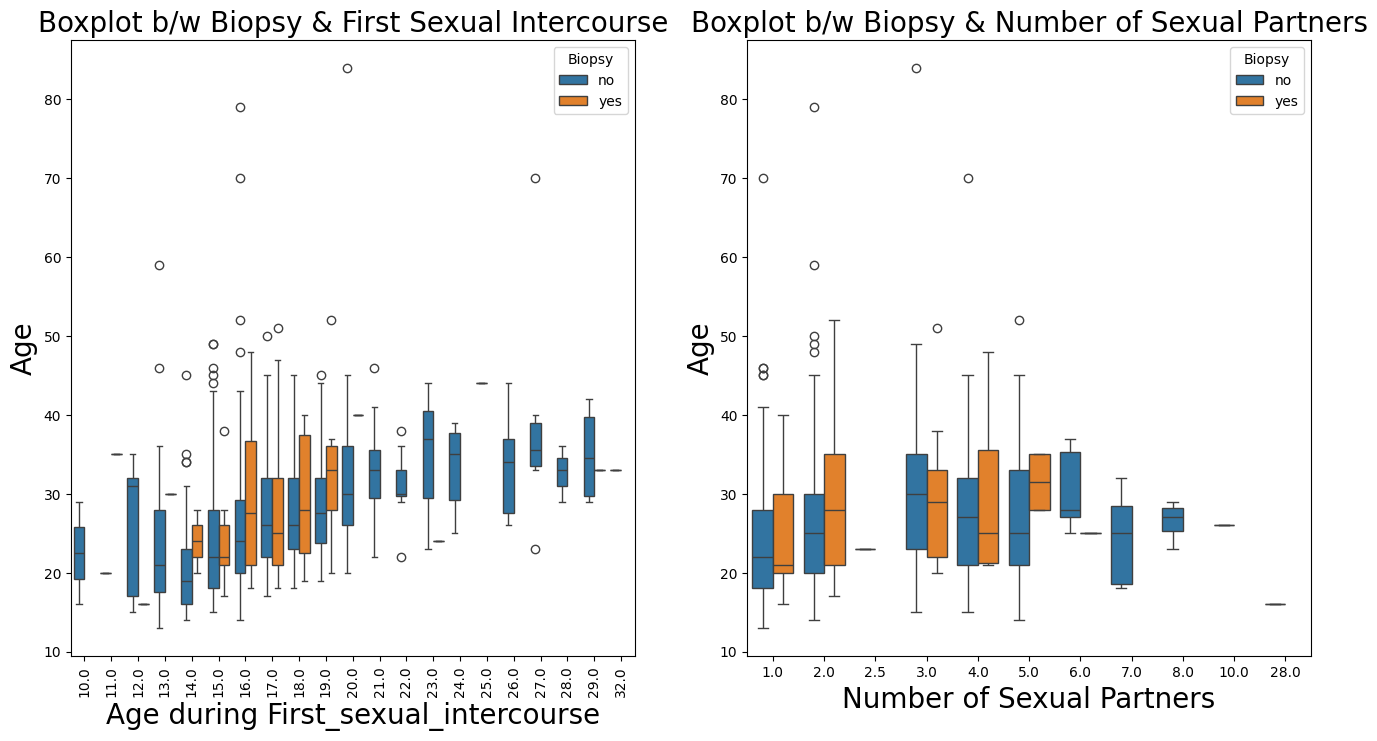

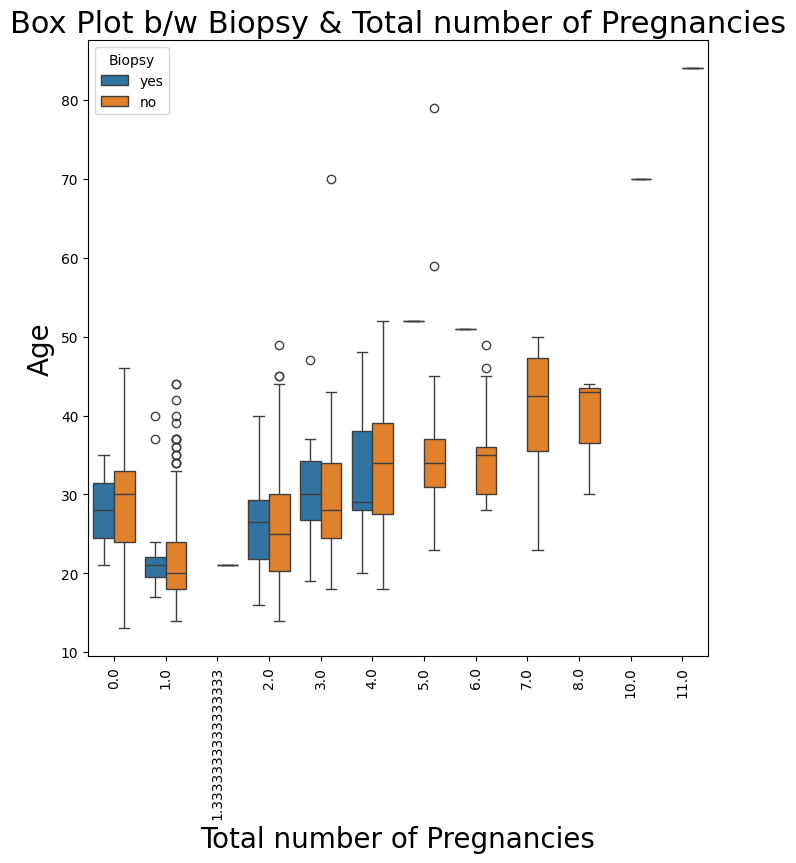

In [42]:
plt.subplots(1,2,figsize=(16,8))
plt.subplot(1,2,1)
a=sns.boxplot(x=impute['First_sexual_intercourse'],y=impute['Age'], hue=impute['Biopsy'])
a.axes.set_title("Boxplot b/w Biopsy & First Sexual Intercourse",fontsize=20)
a.set_xlabel("Age during First_sexual_intercourse",fontsize=20)
a.set_ylabel("Age",fontsize=20)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title('Boxplot b/w Biopsy & Number of Sexual Partners',fontsize=20)
a=sns.boxplot(x=impute['No_of_sex_partner'],y=impute['Age'], hue=impute['Biopsy'])
a.set_xlabel("Number of Sexual Partners",fontsize=20)
a.set_ylabel("Age",fontsize=20)
plt.show()
plt.figure(figsize=(8,8))
a=sns.boxplot(x=impute['No_pregnancies'],y=impute['Age'], hue=impute['Biopsy'])
a.axes.set_title("Box Plot b/w Biopsy & Total number of Pregnancies",fontsize=22)
a.set_xlabel('Total number of Pregnancies',fontsize=20)
plt.xticks(rotation=90)
a.set_ylabel("Age",fontsize=20)
plt.show()

Insights
- Those who had their first sexual intercourse in between 15 and 18 years of their life are more prone to be tested positive with Biopsy test and those people are predominantly in the age group of 20 to 35.
- The persons who have sexual partners between 1 & 3 are more prone to be tested as positive in Biopsy test and they are predominantly in the age group of 20 to 35.
- Higher the number of pregancies, higher the chances of getting positive Biopsy test.

ii) Smoking and Sexual Habits vs Biopsy

Smokes - It indicates whether the person smokes or not

smokes_yr_cat - It indicates for how many years the person has been smoking

smokepack_yr_cat - It indicates how many packets per year the person is smoking

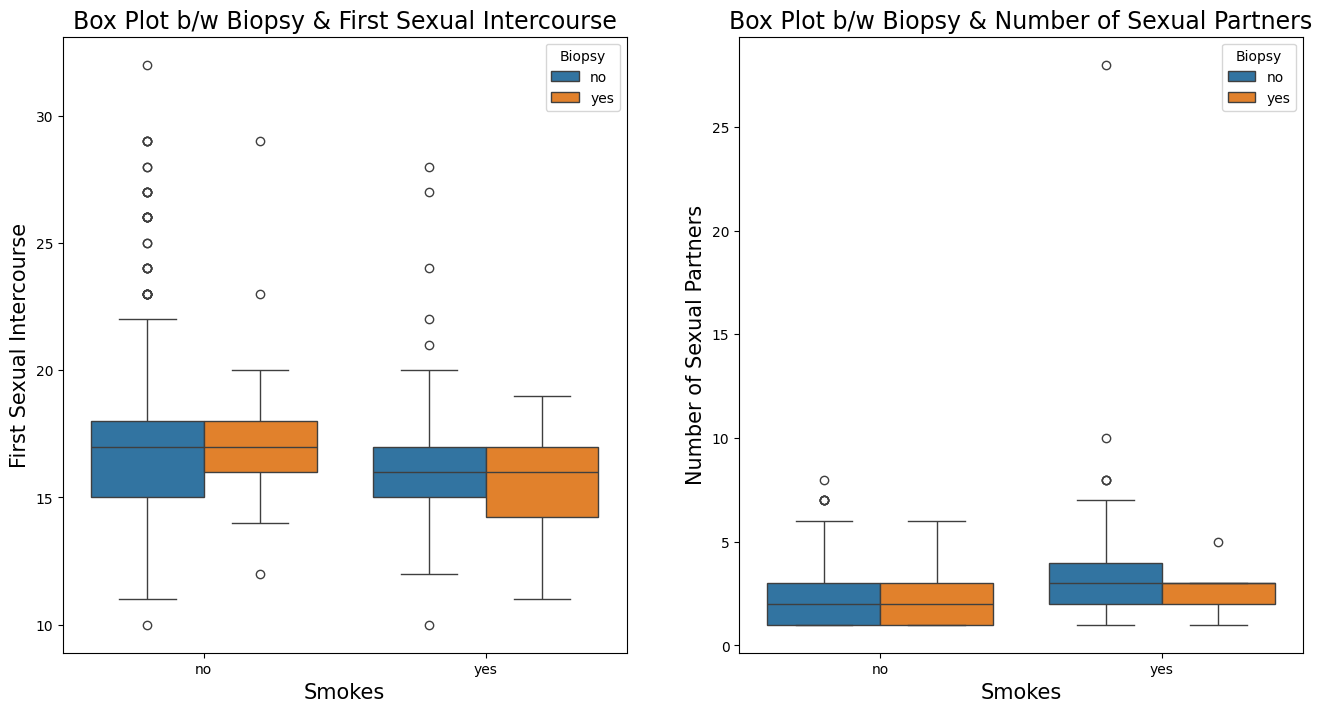

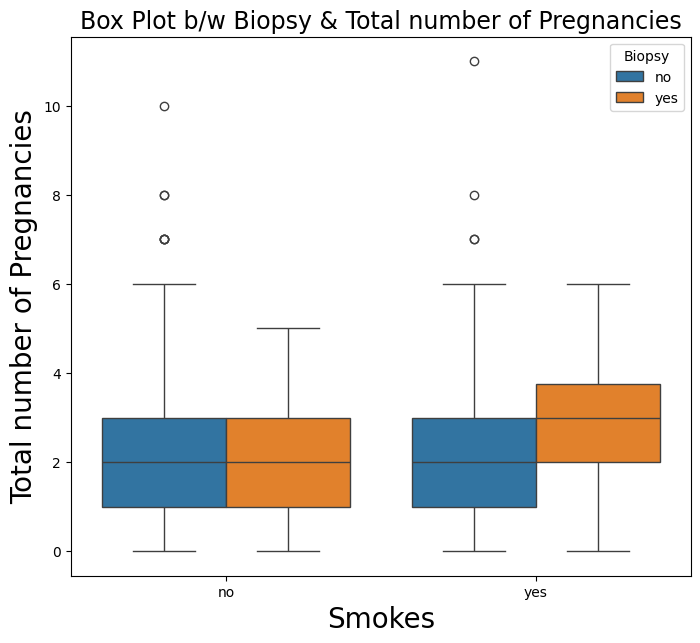

In [43]:
plt.subplots(1,2,figsize=(16,8))
plt.subplot(1,2,1)
a=sns.boxplot(y=impute['First_sexual_intercourse'],hue=impute['Biopsy'],x=impute['Smokes'])
a.axes.set_title("Box Plot b/w Biopsy & First Sexual Intercourse",fontsize=17)
a.set_xlabel("Smokes",fontsize=15)
a.set_ylabel("First Sexual Intercourse",fontsize=15)
plt.subplot(1,2,2)
plt.title('Box Plot b/w Biopsy & Number of Sexual Partners',fontsize=17)
a=sns.boxplot(y=impute['No_of_sex_partner'],hue=impute['Biopsy'],x=impute['Smokes'])
a.set_xlabel("Smokes",fontsize=15)
a.set_ylabel("Number of Sexual Partners",fontsize=15)
plt.figure(figsize=(8,7))
a=sns.boxplot(y=impute['No_pregnancies'],hue=impute['Biopsy'],x=impute['Smokes'])
a.axes.set_title("Box Plot b/w Biopsy & Total number of Pregnancies",fontsize=17)
a.set_xlabel('Smokes',fontsize=20)
a.set_ylabel("Total number of Pregnancies",fontsize=20)
plt.show()

Insights
- Those who smoke and had their first sexual intercourse in younger age between 15yrs and 18yrs are more prone to be test as Positive in Biopsy test.
- There is no clear relation between smoking and number of sex partners as the smoking cancer patients and non smoking patients, both have nearly same number of sex partners.
- The person who smokes and have higher number of pregnancies are more prone to be tested as positive in Biopsy test.

iii) Age and Smoking Habits vs Biopsy


Smokes - It indicates whether the person smokes or not
smokes_yr_cat - It indicates for how many years the person has been smoking
smokepack_yr_cat - It indicates how many packets per year the person is smoking

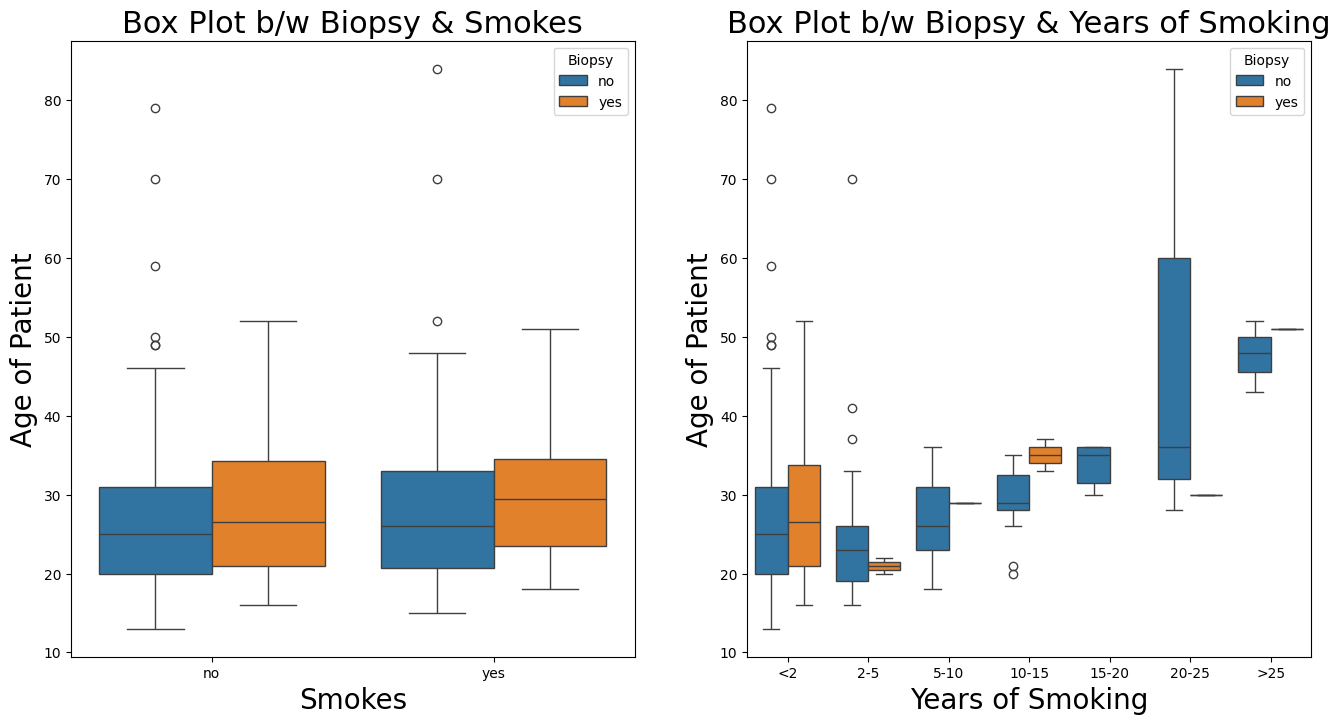

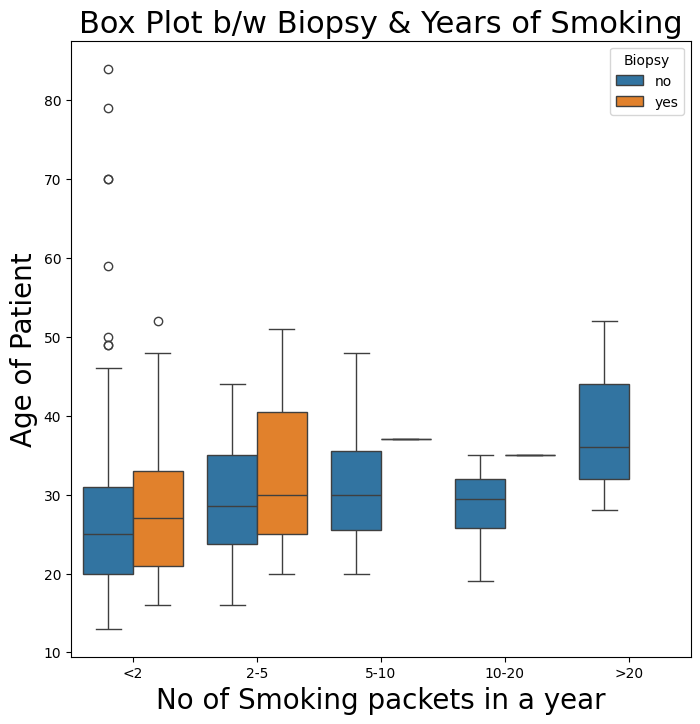

In [44]:
plt.subplots(1,2,figsize=(16,8))
plt.subplot(1,2,1)
b=sns.boxplot(hue=impute['Biopsy'],x=impute['Smokes'],y=impute['Age'])
b.axes.set_title("Box Plot b/w Biopsy & Smokes",fontsize=22)
b.set_xlabel("Smokes",fontsize=20)
b.set_ylabel("Age of Patient",fontsize=20)
plt.subplot(1,2,2)
b=sns.boxplot(hue=impute['Biopsy'],x=impute['smokes_yr_cat'],y=impute['Age'])
b.axes.set_title("Box Plot b/w Biopsy & Years of Smoking",fontsize=22)
b.set_xlabel("Years of Smoking",fontsize=20)
b.set_ylabel("Age of Patient",fontsize=20)
plt.show()
plt.figure(figsize=(8,8))
b=sns.boxplot(hue=impute['Biopsy'],x=impute['smokepack_yr_cat'],y=impute['Age'])
b.axes.set_title("Box Plot b/w Biopsy & Years of Smoking",fontsize=22)
b.set_xlabel("No of Smoking packets in a year",fontsize=20)
b.set_ylabel("Age of Patient",fontsize=20)
plt.show()

Insights

-Cancer can affect to non-smokers as well and even in the young age (around 22 years) and the average age of Smoking cancer patients are higher than those of non smoking cancer patients. So the smoking people who are aged high are more prone to be test as positive.
- The person who has smoked for atleast one year are more prone to be test as positive in Biopsy test
- The person who are aged high and smoke more number of packets a year are prone to be tested as postive in Biopsy test

iv) Birth control attributes & Age vs Biopsy

Hormonal_Contraceptives - Indicates usage of the contraceptives or not

Hormonal_Contraceptives_years - It indicates the years in usage of the contraceptives

IUD - It indicates the usage of IUD contraceptives (A small, often T-shaped birth control device that is inserted into a woman's uterus to prevent pregnancy) or not

IUD_years_bin - It indicates the years in usage of the IUD contraceptives

Hormonal_years_bin - It indicates the years in usage of the hormonal contraceptives

<Axes: xlabel='count', ylabel='IUD_years_bin'>

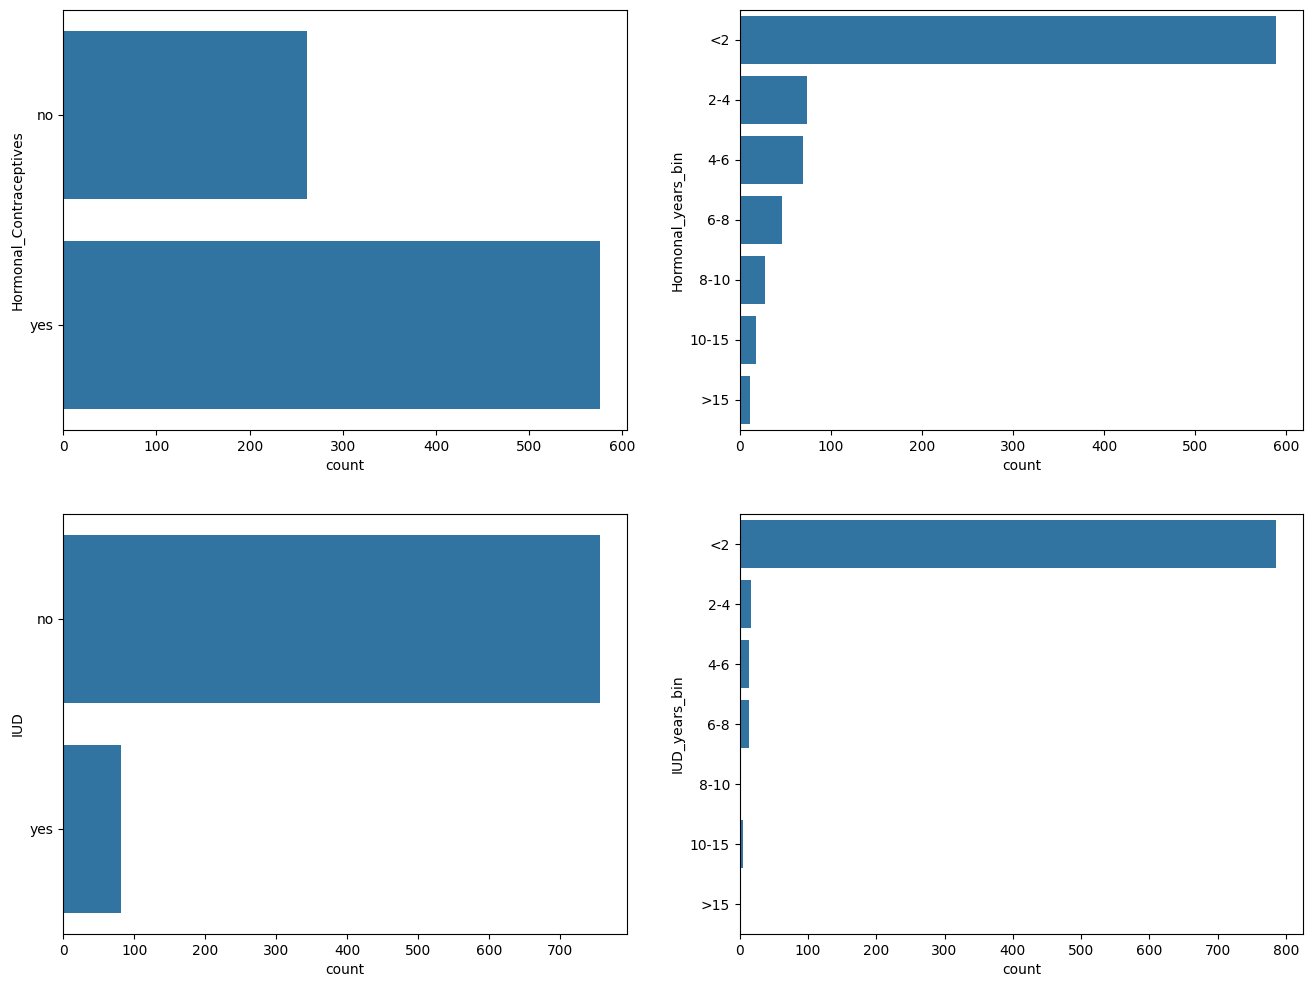

In [45]:
plt.subplots(2,2,figsize=(16,12))
plt.subplot(2,2,1)
sns.countplot(impute['Hormonal_Contraceptives'])
plt.subplot(2,2,2)
sns.countplot(impute['Hormonal_years_bin'])
plt.subplot(2,2,3)
sns.countplot(impute['IUD'])
plt.subplot(2,2,4)
sns.countplot(impute['IUD_years_bin'])

Insights
- Most of the patients have used Hormonal contraceptives methods like pills and medications for birth controls where only a few of them have opted for intrauterine devices (IUDs). The reason for this is may be that hormonal contraceptives are readily available in shops (needs presciption) and one can take those at their home on their own with some sort of guidance where as IUD needs an doctor supervision and the patient needs to be in hospital.

- Generally most patients have used birth control methods only for less than 2 years while very few of them have used upto 8

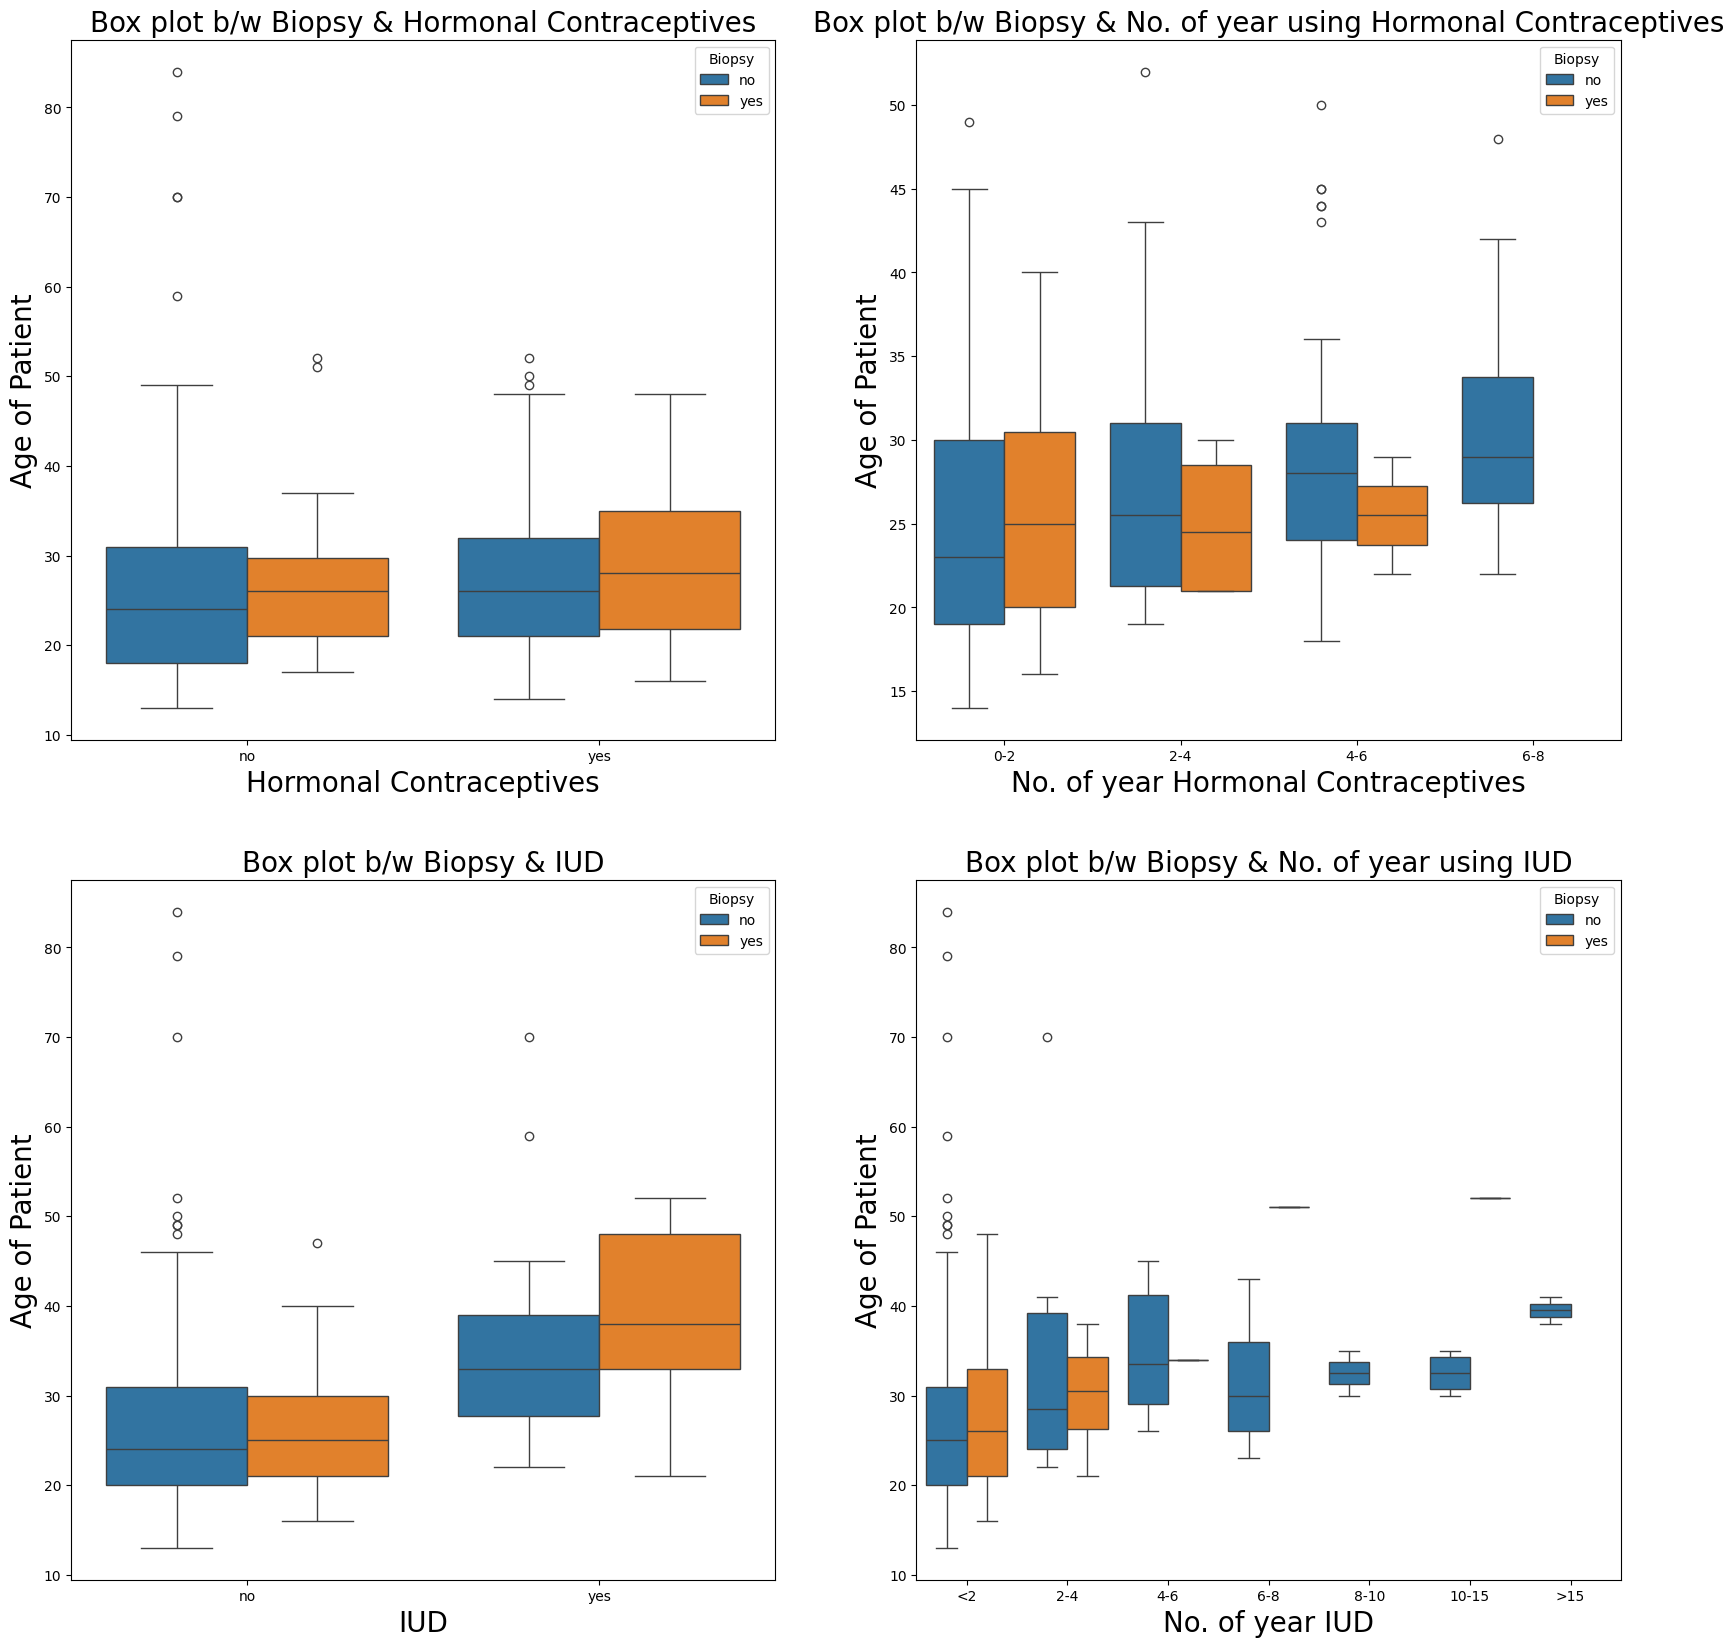

In [46]:
plt.subplots(2,2,figsize=(20,20))
plt.subplot(2,2,1)
c=sns.boxplot(hue=impute['Biopsy'],x=impute['Hormonal_Contraceptives'],y=impute['Age'])
c.axes.set_title('Box plot b/w Biopsy & Hormonal Contraceptives',fontsize=20)
c.set_xlabel('Hormonal Contraceptives',fontsize=20)
c.set_ylabel('Age of Patient',fontsize=20)
plt.subplot(2,2,2)
years=pd.cut(impute.Hormonal_Contraceptives_years,[0,2,4,6,8],labels=['0-2','2-4','4-6','6-8'])
c=sns.boxplot(x=years,y='Age',hue='Biopsy',data=impute)
c.axes.set_title('Box plot b/w Biopsy & No. of year using Hormonal Contraceptives',fontsize=20)
c.set_xlabel('No. of year Hormonal Contraceptives',fontsize=20)
c.set_ylabel('Age of Patient',fontsize=20)
plt.subplot(2,2,3)
c=sns.boxplot(hue=impute['Biopsy'],x=impute['IUD'],y=impute['Age'])
c.axes.set_title('Box plot b/w Biopsy & IUD',fontsize=20)
c.set_xlabel('IUD',fontsize=20)
c.set_ylabel('Age of Patient',fontsize=20)
plt.subplot(2,2,4)
c=sns.boxplot(x='IUD_years_bin',y='Age',hue='Biopsy',data=impute)
c.axes.set_title('Box plot b/w Biopsy & No. of year using IUD',fontsize=20)
c.set_xlabel('No. of year IUD',fontsize=20)
c.set_ylabel('Age of Patient',fontsize=20)
c=sns.boxplot()
plt.show()

Insights
- The persons who did not use the hormonal contraceptives and with more age are high in number, who show positive for Biopsy test
- The patients with 0-4 years of usage in hormonal contraceptives and the average age between 20yrs & 30yrs show positive for Biopsy test.
- The persons who did not use IUD and with lesser age between 25 years & 35 years, show positive for Biopsy test where as among those who used IUD, the higg aged people (around 40) are more prone to cancer.

v) STD attributes & Age vs Biopsy

STDs : Indicates the presence of Sexually Transmitted Diseases

STDs_number : Indicates the total number of sexually
transmitted disease present with the patient

STDs_condylomatosis

STDs_cervical_condylomatosis

STDs_vaginal_condylomatosis

STDs_vulvo_perineal_condylomatosis

STDs_syphilis

STDs_pelvic_inflammatory_disease

STDs_genital_herpes

STDs_molluscum_contagiosum

STDs_AIDS

STDs_HIV

STDs_Hepatitis_B

STDs_HPV

STDs_No_of_diagnosis


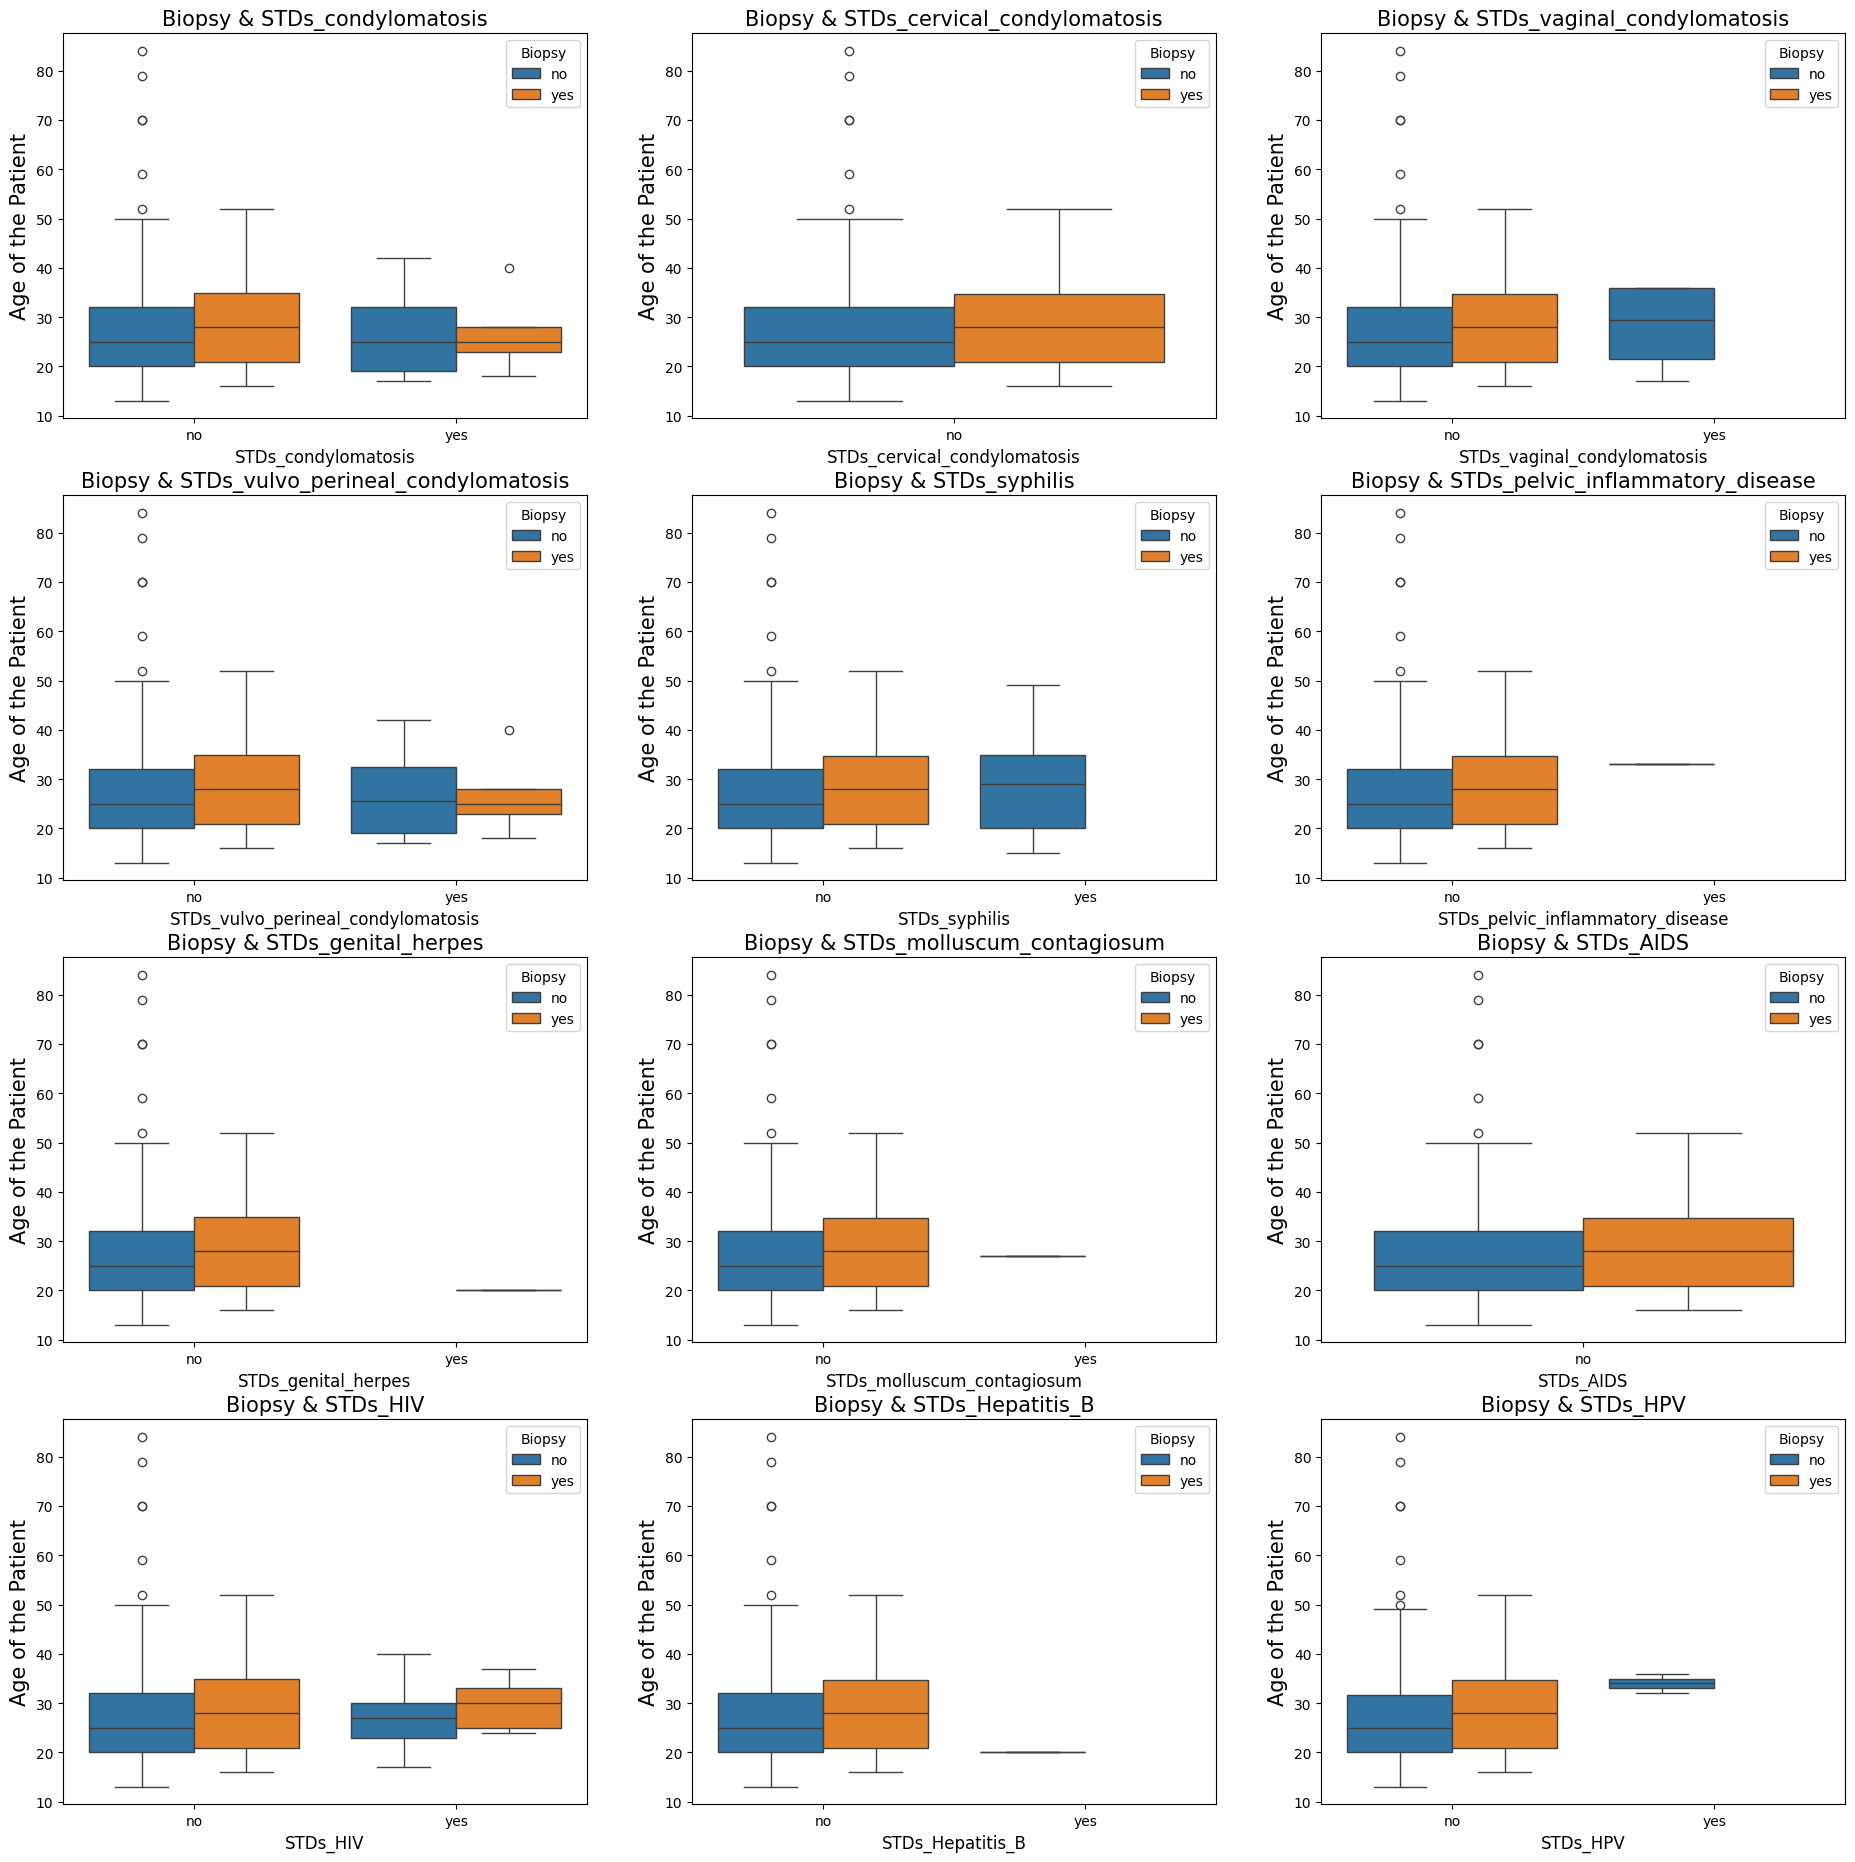

In [51]:
plt.subplots(4,3,figsize=(23,23))
var=['Dummy','STDs_condylomatosis',
 'STDs_cervical_condylomatosis',
 'STDs_vaginal_condylomatosis',
 'STDs_vulvo_perineal_condylomatosis',
 'STDs_syphilis',
 'STDs_pelvic_inflammatory_disease',
 'STDs_genital_herpes',
 'STDs_molluscum_contagiosum',
 'STDs_AIDS',
 'STDs_HIV',
 'STDs_Hepatitis_B',
 'STDs_HPV']
for i in np.arange(1,13):
    plt.subplot(4,3,i)
    d=sns.boxplot(hue='Biopsy',x=var[i],y='Age',data=impute)
    d.axes.set_title('Biopsy & ' + var[i],fontsize=15)
    d.set_xlabel(var[i],fontsize=12)
    d.set_ylabel('Age of the Patient',fontsize=15)

Insights
- In all the plots we can clearly the person with higher age are prone to be tested as Positive in Biopsy test
- We can not predict the effect of individual STDs as the data is not sufficient as there is class in imbalance

# Feature Engineering


In [52]:
numerical=['Age','No_of_sex_partner','First_sexual_intercourse','No_pregnancies','Smokes_yrs','Smokes_packs_yr',
 'Hormonal_Contraceptives_years','IUD_years'] # --> Choosing the proper numerical features

df_copy = df.copy()
df_copy[numerical]=df_copy[numerical].astype('float64')

Age                                 Axes(0.125,0.712609;0.168478x0.167391)
No_of_sex_partner                Axes(0.327174,0.712609;0.168478x0.167391)
First_sexual_intercourse         Axes(0.529348,0.712609;0.168478x0.167391)
No_pregnancies                   Axes(0.731522,0.712609;0.168478x0.167391)
Smokes_yrs                          Axes(0.125,0.511739;0.168478x0.167391)
Smokes_packs_yr                  Axes(0.327174,0.511739;0.168478x0.167391)
Hormonal_Contraceptives_years    Axes(0.529348,0.511739;0.168478x0.167391)
IUD_years                        Axes(0.731522,0.511739;0.168478x0.167391)
dtype: object

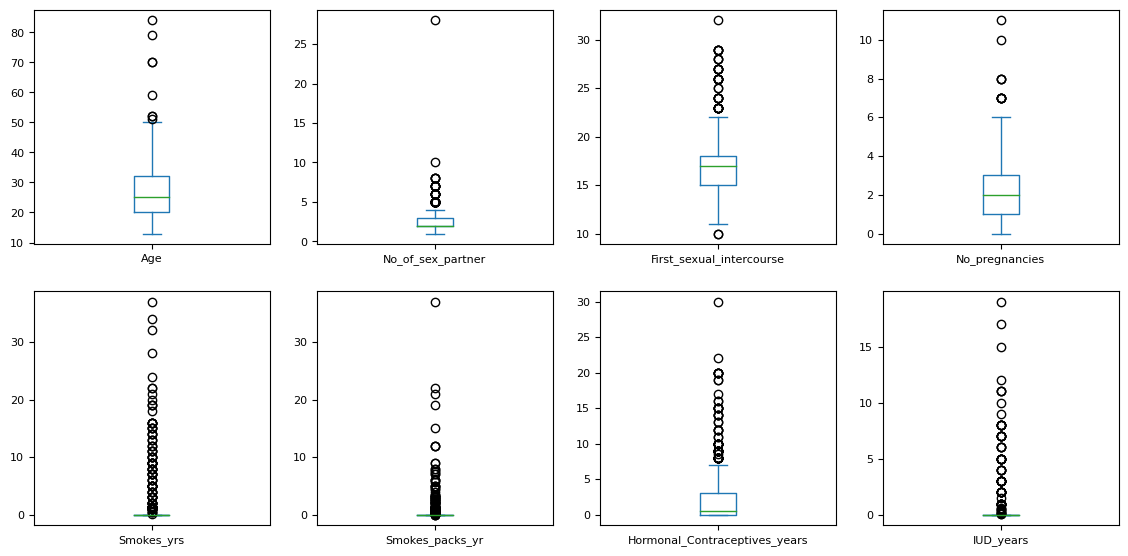

In [53]:
df_copy[numerical].plot(kind='box',subplots=True, layout=(4,4), fontsize=8, figsize=(14,14))

- The above graph implies that the data contains outliers

In [54]:
IQR=df_copy[numerical].describe().T['75%']-df_copy[numerical].describe().T['25%']

min,max=[df_copy[numerical].describe().T['25%']-(IQR*1.5),df_copy[numerical].describe().T['75%']+(IQR*1.5)]

for i in numerical:
    print('range of',i,'b/w',min[i],'and',max[i])

for i in numerical:
    df_copy[i][df_copy[i]>max[i]]=max[i]
    df_copy[i][df_copy[i]<min[i]]=min[i]

range of Age b/w 2.0 and 50.0
range of No_of_sex_partner b/w 0.5 and 4.5
range of First_sexual_intercourse b/w 10.5 and 22.5
range of No_pregnancies b/w -2.0 and 6.0
range of Smokes_yrs b/w 0.0 and 0.0
range of Smokes_packs_yr b/w 0.0 and 0.0
range of Hormonal_Contraceptives_years b/w -4.5 and 7.5
range of IUD_years b/w 0.0 and 0.0


- Here using IQR technique, we have capped the extreme values above the upper whiscur value to the value of upper whiscur and similarly capped the extreme lower values to the value of lower whiscur value

Age                                 Axes(0.125,0.712609;0.168478x0.167391)
No_of_sex_partner                Axes(0.327174,0.712609;0.168478x0.167391)
First_sexual_intercourse         Axes(0.529348,0.712609;0.168478x0.167391)
No_pregnancies                   Axes(0.731522,0.712609;0.168478x0.167391)
Smokes_yrs                          Axes(0.125,0.511739;0.168478x0.167391)
Smokes_packs_yr                  Axes(0.327174,0.511739;0.168478x0.167391)
Hormonal_Contraceptives_years    Axes(0.529348,0.511739;0.168478x0.167391)
IUD_years                        Axes(0.731522,0.511739;0.168478x0.167391)
dtype: object

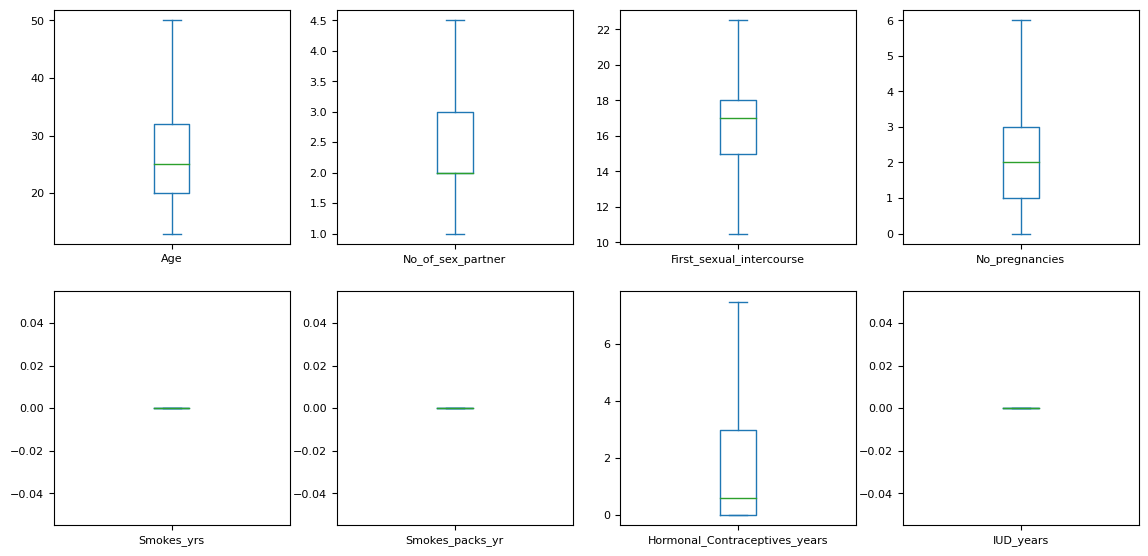

In [55]:
df_copy[numerical].plot(kind='box',subplots=True, layout=(4,4), fontsize=8, figsize=(14,14))

- Now the outliers has been removed/capped

Insights

- While building models ,though outliers removal may have positive impact like getting higher accuracy and other metrics. Once again since it's an medical dataset, it's not recommended to just cap or remove outliers. for example : there are some females who are aged 70+ which comes out as extreme values, generally we should not be capping them to the upper whiscur value (around 50) as it would alter the information provided by the data. Hence we are here building models with the original values as such.

# Base Models

In [56]:
df = df.astype('float64')

x = df.drop('Biopsy', axis=1)
y = df['Biopsy']

SS = StandardScaler()
df_scaled = pd.DataFrame(SS.fit_transform(x), columns = x.columns) # as scaling mandotory for KNN model

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 1)
x_train1,x_test1,y_train,y_test = train_test_split(df_scaled,y, test_size = 0.3, random_state = 1)

l= []  #List to store the various model metrics

In [57]:
def models_lr(x,y):
    mod = {}
    model = LogisticRegression().fit(x,y)
    ypred = model.predict(x_test)
    mod['Model'] = 'LogisticRegression'
    mod['Train_Score'] = model.score(x_train,y_train)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(x_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    return mod
l.append(models_lr(x_train,y_train))

def models_dt(x,y):
    mod = {}
    model = DecisionTreeClassifier().fit(x,y)
    ypred = model.predict(x_test)
    mod['Model'] = 'Decision Tree'
    mod['Train_Score'] = model.score(x_train,y_train)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(x_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    return mod
l.append(models_dt(x_train,y_train))

def models_rf(x,y):
    mod = {}
    model = RandomForestClassifier().fit(x,y)
    ypred = model.predict(x_test)
    mod['Model'] = 'Random Forest'
    mod['Train_Score'] = model.score(x_train,y_train)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(x_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    return mod
l.append(models_rf(x_train,y_train))

def models_nb(x,y):
    mod = {}
    model = GaussianNB().fit(x,y)
    ypred = model.predict(x_test)
    mod['Model'] = 'GaussianNB'
    mod['Train_Score'] = model.score(x_train,y_train)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(x_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    return mod
l.append(models_nb(x_train,y_train))

def models_knn(x,y):
    mod = {}
    model = KNeighborsClassifier().fit(x,y)
    ypred = model.predict(x_test1)
    mod['Model'] = 'KNN'
    mod['Train_Score'] = model.score(x_train1,y_train)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(x_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    return mod
l.append(models_knn(x_train1,y_train))

In [58]:
base_df = pd.DataFrame(l)
base_df

,Model,Train_Score,Test_accuracy,f1score,recall,precision,roc_auc
0,LogisticRegression,0.972696,0.952381,0.571429,0.533333,0.615385,0.756118
1,Decision Tree,1.000000,0.940476,0.634146,0.866667,0.500000,0.905907
2,Random Forest,1.000000,0.944444,0.611111,0.733333,0.523810,0.845570
3,GaussianNB,0.146758,0.095238,0.116279,1.000000,0.061728,0.518987
4,KNN,0.950512,0.936508,0.333333,0.266667,0.444444,0.622785


Evaluation metrics:

Accuracy :

Ratio of correctly predicted observation to the total observations. It is a great measure but only when you have symmetric datasets where values of false positive and false negatives are almost same.

Precision :

The ratio of correctly predicted positive observations to the total predicted positive observations.

Recall (Sensitivity) :
The ratio of correctly predicted positive observations to the all observations in actual class - yes(1).

F1 Score :

The weighted average of Precision and Recall

ROC score :
Measures how well the model can segragate the target classes.


Base Model Inference :

- Specifically as this is an sensitive medical data, recall score needs to be given higher importance and hence we are choosing both "Decision Tree" and "Random Forest" models as our base model because of their higher recall and roc_auc scores.
- Why recall should be given higher importance is that we have to predict actual cancer patients as cancer patient accurately.
- Predicting a cancer patient as a healthy (non-cancer) is very dangerous and if predicted wrongly it may cause chaos to the life of a patient.
- Note : The base models are built using the entire features with default hyper parameters and before oversampling the data.


# Final Model Optimization


- First of all, we have to take care of the data imbalance of the target variable.
- Here we have used OVERSAMPLING TECHNIQUE - SMOTE to overcome the data imbalance

Sampling

In [59]:
x_train_s, y_train_s = SMOTE(random_state=33).fit_resample(x_train, y_train.ravel())
print(sorted(Counter(y_train_s).items()))

[(0.0, 547), (1.0, 547)]


- Now 0 and 1 classes have same proportions

In [60]:
l_final = [] #--> New list for storing metrics of base models

def models_dt(x,y):
    mod = {}
    model = DecisionTreeClassifier().fit(x,y)
    ypred = model.predict(x_test)
    mod['Model'] = 'Decision Tree After Sampling'
    mod['Train_Score'] = model.score(x_train_s,y_train_s)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(x_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    return mod
l_final.append(models_dt(x_train_s,y_train_s))

def models_rf(x,y):
    mod = {}
    model = RandomForestClassifier().fit(x,y)
    ypred = model.predict(x_test)
    mod['Model'] = 'Random Forest After Sampling'
    mod['Train_Score'] = model.score(x_train_s,y_train_s)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(x_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    return mod
l_final.append(models_rf(x_train_s,y_train_s))

In [61]:
final_model = pd.DataFrame(l_final)
final_model

,Model,Train_Score,Test_accuracy,f1score,recall,precision,roc_auc
0,Decision Tree After Sampling,1.0,0.948413,0.666667,0.866667,0.541667,0.910127
1,Random Forest After Sampling,1.0,0.948413,0.648649,0.800000,0.545455,0.878903


Feature selection
- We have used RFE technique for feature selection.
Recursive Feature Elimination (RFE) as its title suggests recursively removes features, builds a model using the remaining attributes and calculates model accuracy.
- RFE is able to work out the combination of attributes that contribute to the prediction on the target variable (or class).
- Used RFE on Decision Tree and Random Forest separately and found the best features for both the models individually.
- The features are choosed based on recall score i.e. which set of features gave the higher reacall score

- ROC-AUC typically used with binary classification problems and it measures area under the curve

In [64]:
for i in range(1,df.shape[1]):

    model = RFE(DecisionTreeClassifier(),i).fit(x,y)
    print(x.columns[model.support_])
    x_train,x_test,y_train,y_test = train_test_split(model.transform(x),y,test_size=0.3,random_state=0)
    dt = DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    y_pred = dt.predict(x_test)
    dt_recall = metrics.roc_auc_score(y_test,y_pred)
    print(dt_recall)
    print('*'*100)

TypeError: RFE.__init__() takes 2 positional arguments but 3 were given

In [65]:
rfe_dt = ['Age', 'No_of_sex_partner', 'First_sexual_intercourse',
       'No_pregnancies', 'Smokes', 'Smokes_yrs', 'Smokes_packs_yr',
       'Hormonal_Contraceptives', 'Hormonal_Contraceptives_years', 'IUD_years',
       'STDs', 'STDs_number', 'STDs_genital_herpes',
       'STDs_molluscum_contagiosum', 'STDs_AIDS', 'STDs_HIV', 'STDs_HPV',
       'STDs_No_of_diagnosis', 'Dx_CIN', 'Schiller', 'Citology']  # Set of features with high recall score

len(rfe_dt)

21

In [66]:
for i in range(1,df.shape[1]):

    model = RFE(RandomForestClassifier(),i).fit(x,y)
    print(x.columns[model.support_])
    x_train,x_test,y_train,y_test = train_test_split(model.transform(x),y,test_size=0.3,random_state=0)
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    y_pred = rf.predict(x_test)
    rf_recall = metrics.roc_auc_score(y_test,y_pred)
    print(rf_recall)
    print('*'*100)

TypeError: RFE.__init__() takes 2 positional arguments but 3 were given

In [67]:
rfe_rf= ['Age', 'No_of_sex_partner', 'First_sexual_intercourse',
       'No_pregnancies', 'Smokes_yrs', 'Smokes_packs_yr',
       'Hormonal_Contraceptives', 'Hormonal_Contraceptives_years', 'IUD',
       'IUD_years', 'STDs_number', 'STDs_condylomatosis',
       'STDs_genital_herpes', 'Dx_CIN', 'Dx_HPV', 'Dx', 'Hinselmann',
       'Schiller', 'Citology']  # Set of features with high recall score

len(rfe_rf)

19

In [68]:
x_train_s = pd.DataFrame(x_train_s, columns = x.columns)
y_train_s = pd.DataFrame(y_train_s, columns = ['Biopsy'])
x_test = pd.DataFrame(x_test, columns=x.columns)

rfe_dt_df_train = x_train_s[rfe_dt]
rfe_dt_df_test = x_test[rfe_dt]
rfe_rf_df_train = x_train_s[rfe_rf]
rfe_rf_df_test = x_test[rfe_rf]

l_feature = []
def models_dt(x,y):
    mod = {}
    model = DecisionTreeClassifier().fit(x,y)
    ypred = model.predict(rfe_dt_df_test)
    mod['Model'] = 'Decision Tree after Feature Selection'
    mod['Train_Score'] = model.score(rfe_dt_df_train,y_train_s.values)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(rfe_dt_df_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    return mod
l_feature.append(models_dt(rfe_dt_df_train,y_train_s.values))

def models_rf(x,y):
    mod = {}
    model = RandomForestClassifier().fit(x,y)
    ypred = model.predict(rfe_rf_df_test)
    mod['Model'] = 'Random Forest after Feature Selection'
    mod['Train_Score'] = model.score(rfe_rf_df_train.values,y_train_s.values)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(rfe_rf_df_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    return mod
l_feature.append(models_rf(rfe_rf_df_train.values,y_train_s.values))

In [69]:
final_model = final_model.append(l_feature)
final_model

,Model,Train_Score,Test_accuracy,f1score,recall,precision,roc_auc
0,Decision Tree After Sampling,1.0,0.948413,0.666667,0.866667,0.541667,0.910127
1,Random Forest After Sampling,1.0,0.948413,0.648649,0.800000,0.545455,0.878903
0,Decision Tree after Feature Selection,1.0,0.956349,0.717949,0.933333,0.583333,0.945570
1,Random Forest after Feature Selection,1.0,0.948413,0.648649,0.800000,0.545455,0.878903


Insights
- So the table shows obviously that recall score has got better after feature selection.
- Let's improve it further by tuning the hyper parameters of the models.

Hyperparameter Tuning


- Used Grid Search Cross Validation for Decision Trees and Randomized Search Cross Validation for Random Forest (GridSearchCV may taker longer time) for chosing the best paramter values

In [70]:
tree = DecisionTreeClassifier()
tree_param = {
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[3,4,5,6],
    'max_features':['auto','log2'],
    'random_state':[123]
}

grid = GridSearchCV(tree, tree_param, cv=10)
best_parameter_search = grid.fit(rfe_dt_df_train,y_train_s.values)
best_parameter_search.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'random_state': 123,
 'splitter': 'best'}

In [71]:
rf = RandomForestClassifier()
rf_params = {
    'n_estimators' : range(10,100,10),
    'max_depth' : range(2,10,1),
    'criterion' : ['gini','entropy'],
    'max_leaf_nodes' : range(2,10,1),
    'max_features' : ['auto','log2']
}

grid = RandomizedSearchCV(rf, rf_params, cv=10)
best_parameter_search = grid.fit(rfe_dt_df_train,y_train_s.values)
best_parameter_search.best_params_

{'n_estimators': 40,
 'max_leaf_nodes': 8,
 'max_features': 'auto',
 'max_depth': 3,
 'criterion': 'gini'}

In [72]:
l_hyper = []

def models_dt(x,y):
    mod = {}
    model = DecisionTreeClassifier(criterion= 'gini', max_depth = 4, max_features = 'auto', random_state = 123, splitter = 'best').fit(x,y)
    ypred = model.predict(rfe_dt_df_test)
    mod['Model'] = 'Decision Tree after Hyperparameter Tuning'
    mod['Train_Score'] = model.score(rfe_dt_df_train,y_train_s.values)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(rfe_dt_df_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    return mod
l_hyper.append(models_dt(rfe_dt_df_train,y_train_s.values))

def models_rf(x,y):
    mod = {}
    model = RandomForestClassifier(criterion= 'gini', max_depth = 9, max_features = 'log2', max_leaf_nodes=9, n_estimators=50).fit(x,y)
    ypred = model.predict(rfe_rf_df_test)
    mod['Model'] = 'Random Forest After Hyperparameter Tuning'
    mod['Train_Score'] = model.score(rfe_rf_df_train,y_train_s.values)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(rfe_rf_df_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    return mod
l_hyper.append(models_rf(rfe_rf_df_train,y_train_s.values))

In [73]:
final_model = final_model.append(l_hyper)
final_model

,Model,Train_Score,Test_accuracy,f1score,recall,precision,roc_auc
0,Decision Tree After Sampling,1.000000,0.948413,0.666667,0.866667,0.541667,0.910127
1,Random Forest After Sampling,1.000000,0.948413,0.648649,0.800000,0.545455,0.878903
0,Decision Tree after Feature Selection,1.000000,0.956349,0.717949,0.933333,0.583333,0.945570
1,Random Forest after Feature Selection,1.000000,0.948413,0.648649,0.800000,0.545455,0.878903
0,Decision Tree after Hyperparameter Tuning,0.983547,0.956349,0.717949,0.933333,0.583333,0.945570
1,Random Forest After Hyperparameter Tuning,0.980804,0.956349,0.717949,0.933333,0.583333,0.945570


- The recall sore has improved after tuning


# Conclusion
- We believe that the models we have chosen will assist the medical experts to predict the cancer more precisely than the traditional methods.
- Moreover, the faster diagnosis of early stages of the cancer can be done with the help of this model.
- This model will also be cost effective method for low and middle class community.

Limitation

- The dataset had a lot missing values, class-imbalance, lack of enough/adequate records (rows/entries) which would adversely affect the model prediction.
- We overcame these limitations by best practices of industry like imputing the null values with algorithms and overcoming class imbalance using sampling techniques.